# Abalone Classification

**Recep İnanç, BSc**

## Plan of Attack

1. Introduction
2. Get Data
3. Explore Data
4. Data Preprocessing
5. Model Selection
6. Evaluation
7. Predict

## 1. Introduction

Data: http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

The **sex** is the value to predict as a classification problem. Identify if a abalone is `infant` or an `adult`.

## 2. Get Data

### 2.1 Data Dictionary

This [link](http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names) provides a detailed information about the data.

**Data Dictionary**


|Name          |Data Type |Meas.|Description|
|--------------|----------|-----|-----------|
|Sex           |nominal   |-	|M, F, and I (infant)|
|Length        |continuous|mm	|Longest shell measurement|
|Diameter      |continuous|mm	|perpendicular to length|
|Height        |continuous|mm	|with meat in shell|
|Whole weight  |continuous|grams|whole abalone|
|Shucked weight|continuous|grams|weight of meat|
|Viscera weight|continuous|grams|gut weight (after bleeding)|
|Shell weight  |continuous|grams|after being dried|
|Rings         |integer	  |-    |+1.5 gives the age in years|

### 2.2. Load Data

In [137]:
import pandas as pd

In [138]:
data = pd.read_csv("data/abalone.data",
                        names=["sex",
                               "length",
                               "diameter",
                               "height",
                               "whole_weight",
                               "shucked_weight",
                               "viscera_weight",
                               "shell_weight",
                               "rings"
                              ])
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 3. Explore Data

It is important to have some expectations for the data before we move on to exploring part. This way we can analyze the data better, and justify the results, and have questions to be answered like "Why `rings` value is not increasing as we increase `shell_weight`?" etc.

**Expectations**  


My expectations are as follows:

I expect as we increase `length`, `height`, `diameter` and `*_weight`, `rings` also increases.  
I expect `sex=infants` will have `less rings` compared to others.

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


No missing value in the dataset.  

We have only 1 categorical variable, which is good for us since we can get better visualizations.

### 2.3 Split Data

Splitting the data into test and training sets and putting the test set aside before we modify the data to explore is a good practice to prevent our brain to mislead us.  

This way our model will be evaluated better on our test set.

In [142]:
from sklearn.utils import shuffle

data = shuffle(data)
train_ratio = 0.8
train_size = int(len(data)*0.8)
test_size = len(data) - train_size

train_df = data[:train_size]
test_df = data[train_size:train_size+test_size]
print("Train Dataframe size:",len(train_df))
print("Test Dataframe size:",len(test_df))

Train Dataframe size: 3341
Test Dataframe size: 836


In [143]:
df_explore = train_df.copy()

### 3.1. Univariate Analysis

#### 3.1.1 Rings - Target Variable

In [144]:
df_explore.rings.value_counts().shape[0]

26

There are 28 different rings.

>Hey `rings` ;) Let me see your shape!

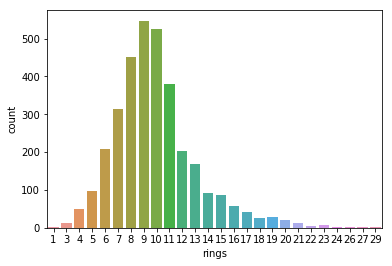

In [145]:
sns.countplot(x="rings", data=df_explore)

This is a great distribution! This distribution is so close to be a normal distribution, the only problem is that it has longer tail towards the higher values but that's totally fine.

In [146]:
print("Mean: ", df_explore['rings'].mean())
print("Mode: ", df_explore['rings'].mode().values)
print("Median: ", df_explore['rings'].median())

Mean:  9.90990721340916
Mode:  [9]
Median:  9.0


The closer these values to each other, the closer our data to be have normal distribution.

#### 3.1.2 Sex

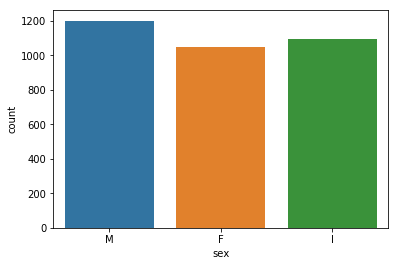

In [147]:
sns.countplot(x="sex", data=df_explore)

This one also looks fine.

In [148]:
df_explore["sex"].describe()

count     3341
unique       3
top          M
freq      1200
Name: sex, dtype: object

In [149]:
adult_df = df_explore[df_explore['sex'] != 'I']
infant_df = df_explore[df_explore['sex'] == 'I']

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Adult/Infant vs Rings')

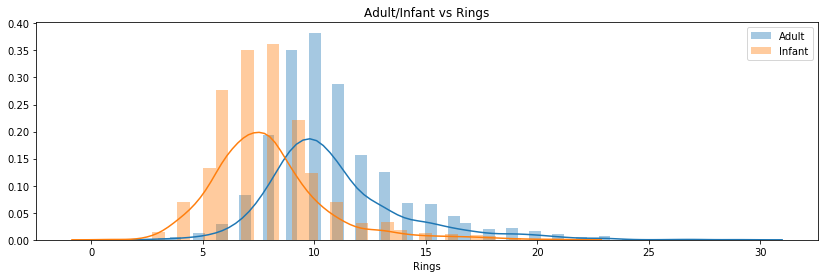

In [150]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(111)

sns.distplot(adult_df['rings'], label="Adult", ax=ax1)
sns.distplot(infant_df['rings'], label="Infant", ax=ax1)
ax1.legend()
ax1.set_xlabel("Rings")
ax1.set_title("Adult/Infant vs Rings")

This is the distribution of Adult/Infant Rings. 

What we can take out of this plot:

- Adults have higher ring counts
- An infant can become an adult after it got its 4th or 5th ring.
- There may be infants that almost have the same number of rings as the oldest adult.
- An infant has 7-8 rings on average, whereas an adult has 10 rings on average.

#### 3.1.3 Measurement Variables

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Size Distributions')

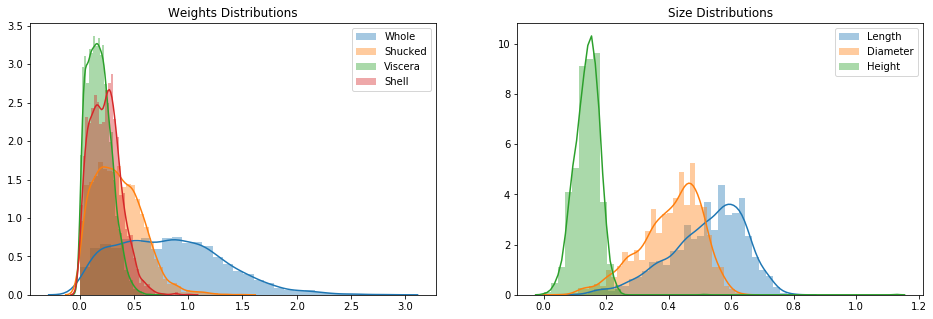

In [151]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot weight information
sns.distplot(df_explore['whole_weight'],   label='Whole',   ax=ax1)
sns.distplot(df_explore['shucked_weight'], label='Shucked', ax=ax1)
sns.distplot(df_explore['viscera_weight'], label='Viscera', ax=ax1)
sns.distplot(df_explore['shell_weight'],   label='Shell',   ax=ax1)
ax1.legend()

# Plot growth information
sns.distplot(df_explore['length'],   label='Length', ax=ax2)
sns.distplot(df_explore['diameter'], label='Diameter', ax=ax2)
sns.distplot(df_explore['height'],   label='Height', ax=ax2)
ax2.legend()

ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_title('Weights Distributions')
ax2.set_title('Size Distributions')

### 3.2. Multivariate Analysis

#### 3.2.1 Sex / Weight&Size

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Infant - Size Distributions')

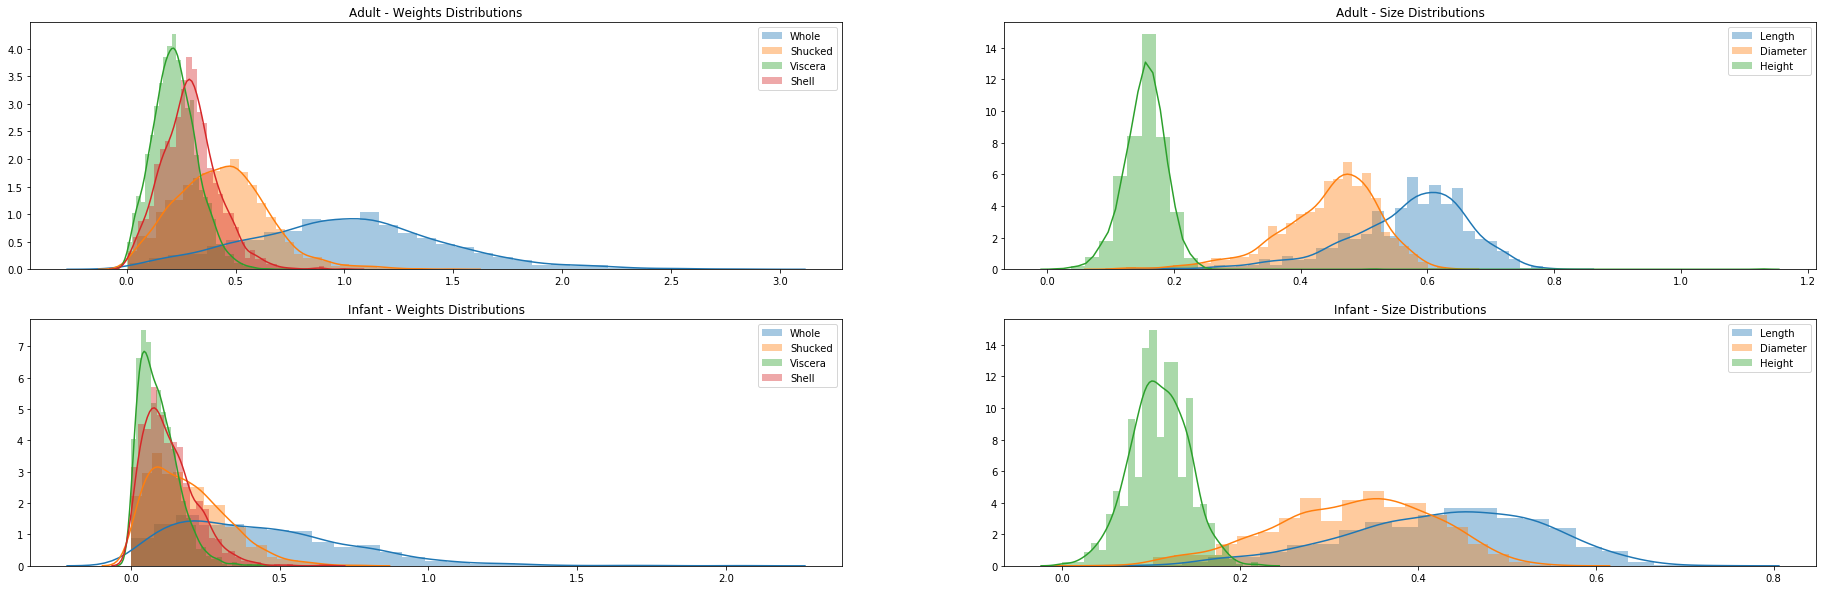

In [152]:
fig = plt.figure(figsize=(32,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Plot weight information
sns.distplot(adult_df['whole_weight'],   label='Whole',   ax=ax1)
sns.distplot(adult_df['shucked_weight'], label='Shucked', ax=ax1)
sns.distplot(adult_df['viscera_weight'], label='Viscera', ax=ax1)
sns.distplot(adult_df['shell_weight'],   label='Shell',   ax=ax1)
ax1.legend()

# Plot growth information
sns.distplot(adult_df['length'],   label='Length', ax=ax2)
sns.distplot(adult_df['diameter'], label='Diameter', ax=ax2)
sns.distplot(adult_df['height'],   label='Height', ax=ax2)
ax2.legend()

ax1.set_xlabel('')
ax1.set_title('Adult - Weights Distributions')
ax2.set_xlabel('')
ax2.set_title('Adult - Size Distributions')

# Plot weight information
sns.distplot(infant_df['whole_weight'],   label='Whole',   ax=ax3)
sns.distplot(infant_df['shucked_weight'], label='Shucked', ax=ax3)
sns.distplot(infant_df['viscera_weight'], label='Viscera', ax=ax3)
sns.distplot(infant_df['shell_weight'],   label='Shell',   ax=ax3)
ax3.legend()

# Plot growth information
sns.distplot(infant_df['length'],   label='Length', ax=ax4)
sns.distplot(infant_df['diameter'], label='Diameter', ax=ax4)
sns.distplot(infant_df['height'],   label='Height', ax=ax4)
ax4.legend()

ax3.set_xlabel('')
ax3.set_title('Infant - Weights Distributions')
ax4.set_xlabel('')
ax4.set_title('Infant - Size Distributions')

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Female - Size Distributions')

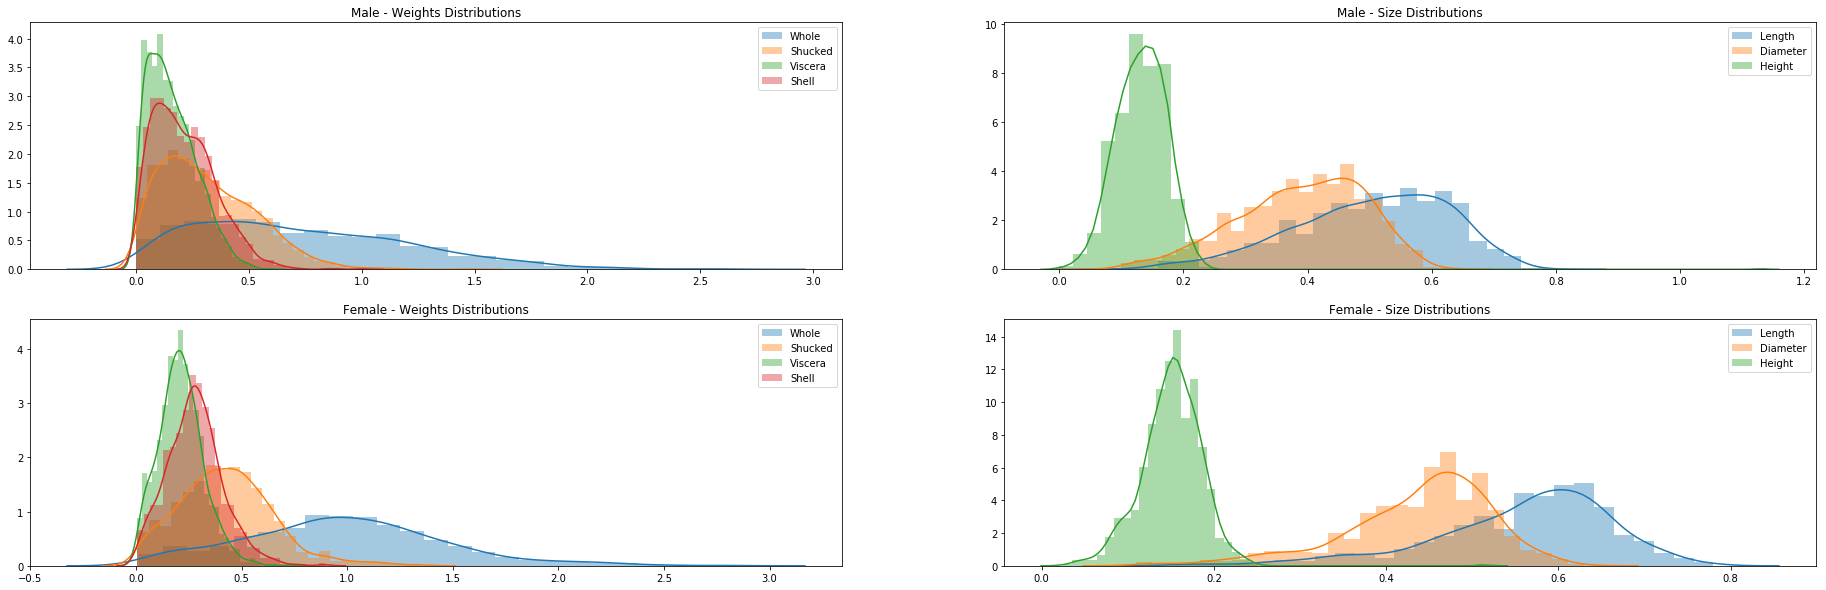

In [153]:
male_df = df_explore[df_explore['sex'] != 'M']
female_df = df_explore[df_explore['sex'] == 'M']

fig = plt.figure(figsize=(32,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Plot weight information
sns.distplot(male_df['whole_weight'],   label='Whole',   ax=ax1)
sns.distplot(male_df['shucked_weight'], label='Shucked', ax=ax1)
sns.distplot(male_df['viscera_weight'], label='Viscera', ax=ax1)
sns.distplot(male_df['shell_weight'],   label='Shell',   ax=ax1)
ax1.legend()

# Plot growth information
sns.distplot(male_df['length'],   label='Length', ax=ax2)
sns.distplot(male_df['diameter'], label='Diameter', ax=ax2)
sns.distplot(male_df['height'],   label='Height', ax=ax2)
ax2.legend()

ax1.set_xlabel('')
ax1.set_title('Male - Weights Distributions')
ax2.set_xlabel('')
ax2.set_title('Male - Size Distributions')

# Plot weight information
sns.distplot(female_df['whole_weight'],   label='Whole',   ax=ax3)
sns.distplot(female_df['shucked_weight'], label='Shucked', ax=ax3)
sns.distplot(female_df['viscera_weight'], label='Viscera', ax=ax3)
sns.distplot(female_df['shell_weight'],   label='Shell',   ax=ax3)
ax3.legend()

# Plot growth information
sns.distplot(female_df['length'],   label='Length', ax=ax4)
sns.distplot(female_df['diameter'], label='Diameter', ax=ax4)
sns.distplot(female_df['height'],   label='Height', ax=ax4)
ax4.legend()

ax3.set_xlabel('')
ax3.set_title('Female - Weights Distributions')
ax4.set_xlabel('')
ax4.set_title('Female - Size Distributions')

#### 3.3.3 Sex vs Other Parameters

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


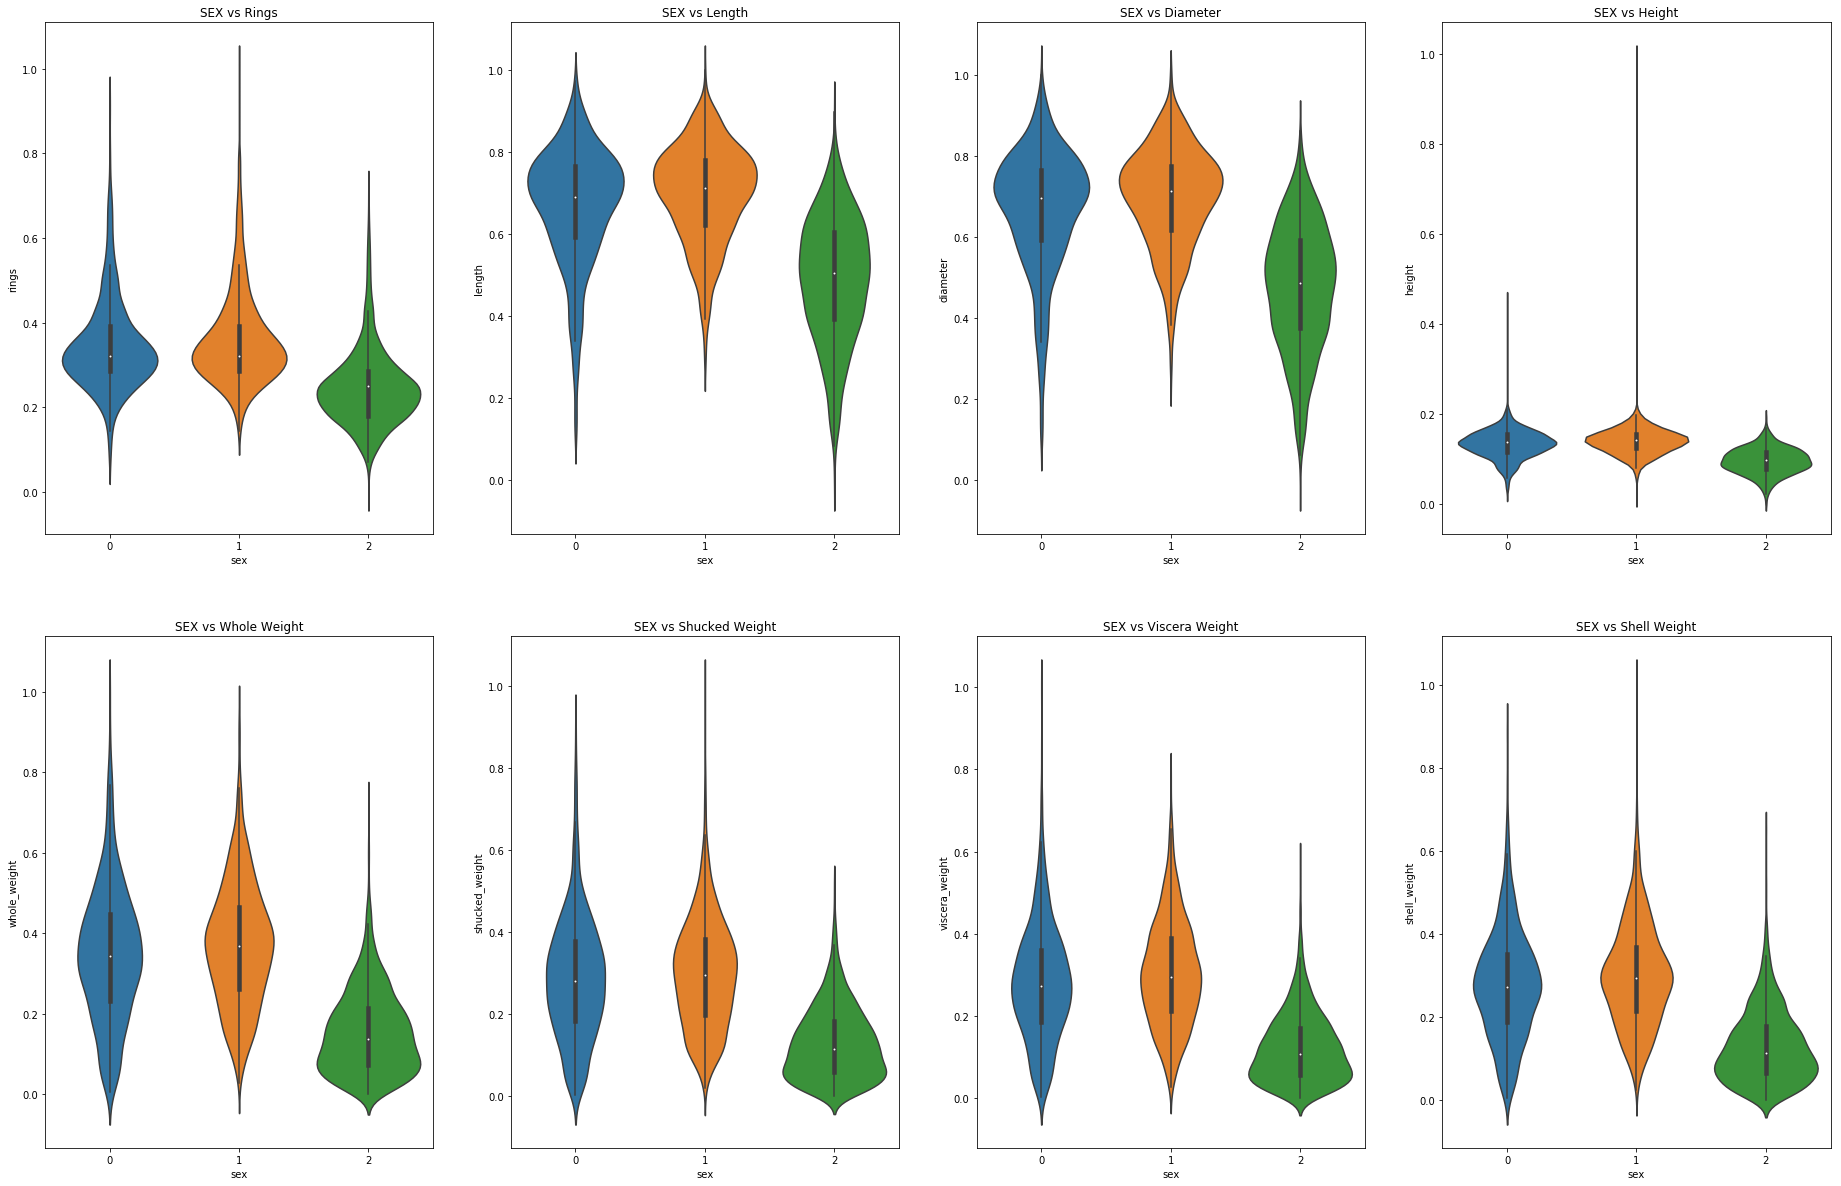

In [186]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(32,32))
ax1 = fig.add_subplot(341)
ax2 = fig.add_subplot(342)
ax3 = fig.add_subplot(343)
ax4 = fig.add_subplot(344)
ax5 = fig.add_subplot(345)
ax6 = fig.add_subplot(346)
ax7 = fig.add_subplot(347)
ax8 = fig.add_subplot(348)

ax1.set_title('SEX vs Rings')
ax2.set_title('SEX vs Length')
ax3.set_title('SEX vs Diameter')
ax4.set_title('SEX vs Height')
ax5.set_title('SEX vs Whole Weight')
ax6.set_title('SEX vs Shucked Weight')
ax7.set_title('SEX vs Viscera Weight')
ax8.set_title('SEX vs Shell Weight')

sns.violinplot(x="sex", y="rings", data=df_explore, ax=ax1)
sns.violinplot(x="sex", y="length", data=df_explore, ax=ax2)
sns.violinplot(x="sex", y="diameter", data=df_explore, ax=ax3)
sns.violinplot(x="sex", y="height", data=df_explore, ax=ax4)
sns.violinplot(x="sex", y="whole_weight", data=df_explore, ax=ax5)
sns.violinplot(x="sex", y="shucked_weight", data=df_explore, ax=ax6)
sns.violinplot(x="sex", y="viscera_weight", data=df_explore, ax=ax7)
sns.violinplot(x="sex", y="shell_weight", data=df_explore, ax=ax8)

Male and Female are almost identical if we look at this plot.

#### 3.2.2 All Pairplot

In [154]:
adulthood_mapper = {"M":0,"F":0,"I":1}
df_explore = df_explore.assign(infant=df_explore.sex.replace(adulthood_mapper))

In [ ]:
sns.pairplot(data=df_explore)

Clearly most of the relations looks like linear or exponantial relations.  
This data is pretty good for using a linear or exponantial regression model.

## 4. Data Preprocessing

### 4.1 Feature Engineering

#### 4.1.1 Create new Feature - Volume

After analyzing these attributes I decided to see if can I create a new attribute: `volume`, and test its correlation.  

In [156]:
import numpy as np

I think the closest one for the volume of a abalone is a cone.
Volume formula for cone: pi*r^2*h/3

In [157]:
volumes = (np.pi * ((df_explore.diameter/2)**2) * df_explore.height)/3
volumes.describe()

count    3341.000000
mean        0.007077
std         0.004401
min         0.000000
25%         0.003584
50%         0.006763
75%         0.010042
max         0.043040
dtype: float64

In [158]:
df_explore = df_explore.assign(volume=volumes)

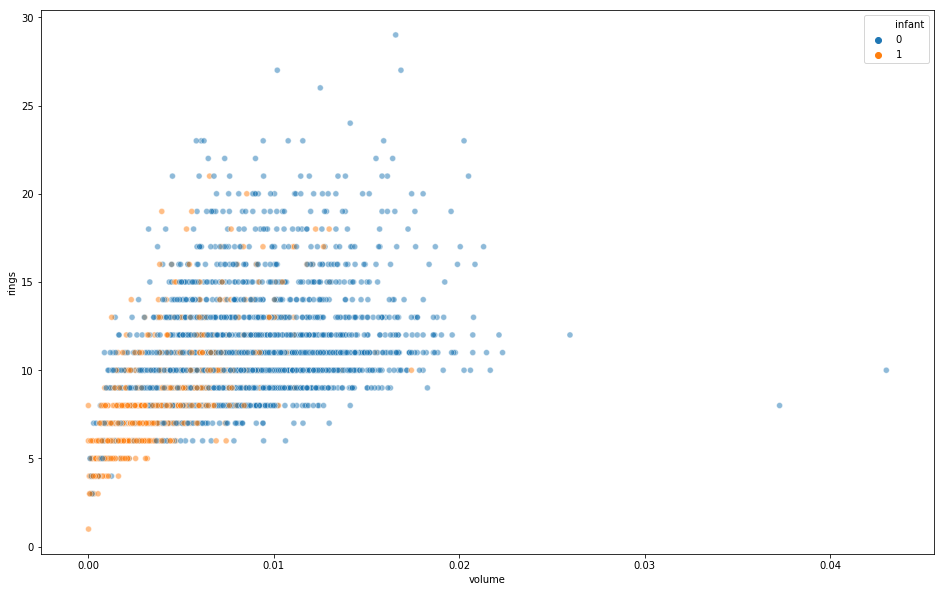

In [159]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="volume", y="rings", hue="infant", data=df_explore, alpha=0.5)

Apparently there are some outliers, let's view them and see if anything is wrong with them.

In [160]:
df_explore.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,infant,volume
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.522778,0.406772,0.139292,0.823286,0.356870,0.179469,0.237265,9.909907,0.327746,0.007077
std,0.120377,0.099286,0.042627,0.487315,0.220111,0.109178,0.138768,3.237407,0.469462,0.004401
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.345000,0.115000,0.440500,0.182500,0.093000,0.130000,8.000000,0.000000,0.003584
50%,0.545000,0.425000,0.140000,0.796000,0.334500,0.169500,0.230000,9.000000,0.000000,0.006763
75%,0.615000,0.480000,0.165000,1.144500,0.500500,0.250500,0.325000,11.000000,1.000000,0.010042
max,0.800000,0.630000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,0.043040


In [161]:
df_explore[df_explore.volume > 0.03]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,infant,volume
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10,0,0.043040
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8,0,0.037282


The data looks normal besides being too large :D

Both of them are adults.

Let's check the correlation map to see if this new attribute has a better correlation.

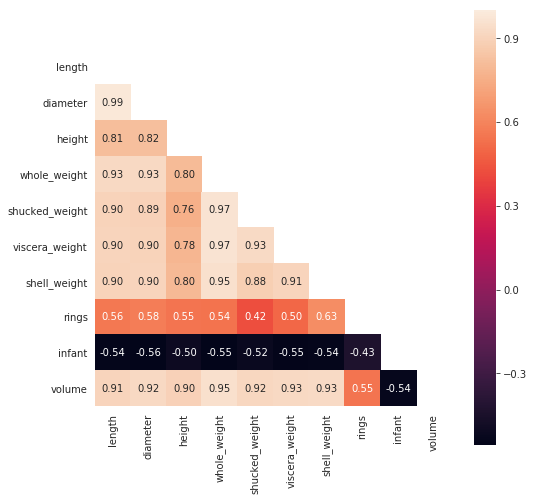

In [162]:
plt.figure(figsize=(8,8))
corr_map = df_explore.corr()
mask = np.zeros_like(corr_map)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(data=corr_map, mask=mask, annot=True, fmt=".2f",square=True)

#### 4.1.2 Create Target Variable - Adult (or not?)

In [187]:
adulthood_mapper = {"M":1,"F":1,"I":0}
df_explore = df_explore.assign(adult=data.sex.replace(adulthood_mapper))
df_explore = df_explore.drop("sex", axis=1)

### 4.2 Handle Categorical Variables

Only categorical variable was `sex` and I removed it. So...  
That's it for categorical variables, I wish we had some more to apply encode and other stuff but...  
Ok, maybe next time.

### 4.3 Handle Numerical Variables

I am going to apply feature scaling to all numerical variables.  
- Luckily, there are no missing values!
- The distributions also look fine.

#### 4.3.1 Feature Scaling

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
scaler = MinMaxScaler()

num_attributes = ["length", 
                  "diameter",
                  "height",
                  "whole_weight",
                  "shucked_weight",
                  "viscera_weight",
                  "shell_weight",
                  "rings",
                  "volume"]
df_to_scale = df_explore[num_attributes]
df_explore[num_attributes] = scaler.fit_transform(df_to_scale)
df_explore.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,infant,volume,adult
3005,0.834483,0.843478,0.185841,0.632725,0.560525,0.536537,0.433981,0.428571,0,0.372480,1
2473,0.744828,0.721739,0.154867,0.459182,0.344654,0.450955,0.317389,0.464286,0,0.235142,1
2319,0.593103,0.591304,0.128319,0.230034,0.180565,0.200790,0.202790,0.500000,0,0.137613,1
804,0.606897,0.565217,0.119469,0.233575,0.192670,0.275181,0.152965,0.321429,0,0.118576,1
2800,0.779310,0.765217,0.150442,0.433682,0.328850,0.495721,0.285002,0.357143,0,0.253370,1


### 4.4 Finalize Train and Test Data Preprocessing

In [190]:
df_explore.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,infant,volume,adult
3005,0.834483,0.843478,0.185841,0.632725,0.560525,0.536537,0.433981,0.428571,0,0.372480,1
2473,0.744828,0.721739,0.154867,0.459182,0.344654,0.450955,0.317389,0.464286,0,0.235142,1
2319,0.593103,0.591304,0.128319,0.230034,0.180565,0.200790,0.202790,0.500000,0,0.137613,1
804,0.606897,0.565217,0.119469,0.233575,0.192670,0.275181,0.152965,0.321429,0,0.118576,1
2800,0.779310,0.765217,0.150442,0.433682,0.328850,0.495721,0.285002,0.357143,0,0.253370,1


In [191]:
train_df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
3005,M,0.680,0.540,0.210,1.7885,0.8345,0.4080,0.4370,13
2473,F,0.615,0.470,0.175,1.2985,0.5135,0.3430,0.3200,14
2319,F,0.505,0.395,0.145,0.6515,0.2695,0.1530,0.2050,15
804,M,0.515,0.380,0.135,0.6615,0.2875,0.2095,0.1550,10
2800,F,0.640,0.495,0.170,1.2265,0.4900,0.3770,0.2875,11


In [241]:
X_train_validation_df = train_df.drop("sex", axis=1).copy()
y_train_validation_df = train_df["sex"].copy()

X_test_df = test_df.drop("sex", axis=1).copy()
y_test_df = test_df["sex"].copy()

train_volumes = (np.pi * ((X_train_validation_df.diameter/2)**2) * X_train_validation_df.height)/3
test_volumes = (np.pi * ((X_test_df.diameter/2)**2) * X_test_df.height)/3

X_train_validation_df = X_train_validation_df.assign(volume=train_volumes)
X_test_df = X_test_df.assign(volume=test_volumes)

adulthood_mapper = {"M":1,"F":1,"I":0}
y_train_validation_df = y_train_validation_df.map(adulthood_mapper)
y_test_df = y_test_df.map(adulthood_mapper)

scaler = MinMaxScaler()
num_attributes = ["length", "diameter","height","whole_weight","shucked_weight",
                  "viscera_weight","shell_weight","rings","volume"]
X_train_validation_df_scaled = X_train_validation_df.copy()
X_train_validation_df_to_scale = X_train_validation_df[num_attributes].copy()
X_train_validation_df_scaled[num_attributes] = scaler.fit_transform(X_train_validation_df_to_scale)

X_test_df_scaled = X_test_df.copy()
X_test_df_to_scale = X_test_df[num_attributes].copy()
X_test_df_scaled[num_attributes] = scaler.fit_transform(X_test_df_to_scale)

X_train_validation = X_train_validation_df_scaled.copy()
X_test = X_test_df_scaled.copy()
y_train_validation = y_train_validation_df.copy()
y_test = y_test_df.copy()

print(X_train_validation.shape)
print(y_train_validation.shape)
print(X_test.shape)
print(y_test.shape)

(3341, 9)
(3341,)
(836, 9)
(836,)


In [242]:
del X_train_validation_df, X_test_df, y_train_validation_df, y_test_df, X_train_validation_df_scaled, X_train_validation_df_to_scale, X_test_df_scaled

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size= 0.1, random_state=42)

In [319]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 3561 to 2991
Data columns (total 9 columns):
length            3006 non-null float64
diameter          3006 non-null float64
height            3006 non-null float64
whole_weight      3006 non-null float64
shucked_weight    3006 non-null float64
viscera_weight    3006 non-null float64
shell_weight      3006 non-null float64
rings             3006 non-null float64
volume            3006 non-null float64
dtypes: float64(9)
memory usage: 234.8 KB


In [246]:
y_train.value_counts()

1    2013
0     993
Name: sex, dtype: int64

## 5. Model Selection

### 5.1. Training

In [201]:
from sklearn.metrics import accuracy_score

The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

#### 5.1.1 MLP

In [202]:
from sklearn.neural_network import MLPClassifier

In [247]:
mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train, y_train)

print("MLP model is trained.")

MLP model is trained.


In [248]:
mlp_base_prediction = mlp_classifier.predict(X_validation)
print(accuracy_score(y_validation, mlp_base_prediction))

0.808955223880597


#### 5.1.2 KNN

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [249]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print("KNN model is trained.")

KNN model is trained.


In [250]:
knn_base_prediction = knn_classifier.predict(X_validation)
print(accuracy_score(y_validation, knn_base_prediction))

0.808955223880597


#### 5.1.3. Decision Tree

In [208]:
from sklearn.tree import DecisionTreeClassifier

In [251]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

print("DecisionTree model is trained.")

DecisionTree model is trained.


In [252]:
tree_base_prediction = tree_classifier.predict(X_validation)
print(accuracy_score(y_validation, tree_base_prediction))

0.7731343283582089


#### 5.1.4. RandomForest

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
forest_classifier = RandomForestClassifier(random_state=42)
forest_classifier.fit(X_train, y_train)

print("RandomForest model is trained.")

RandomForest model is trained.


In [254]:
forest_base_prediction = forest_classifier.predict(X_validation)
print(accuracy_score(y_validation, forest_base_prediction))

0.7970149253731343


In [255]:
from sklearn.svm import SVC

In [256]:
svc_classifier = SVC(kernel="linear", C=0.025)
svc_classifier.fit(X_train, y_train)

print("SVC model is trained.")

SVC model is trained.


In [257]:
svc_base_prediction = svc_classifier.predict(X_validation)
print(accuracy_score(y_validation, svc_base_prediction))

0.7880597014925373


### 5.2 GridSearch

I really am a big fan of GridSearch! Before moving on to `Evaluation` step, we would like to look for the parameters for our base models, and complete the `Model Selection` part by having our models tuned.

Later on evaluation of our models will make more sense, and will be more generalized.

In [1]:
from sklearn.model_selection import GridSearchCV

#### 5.2.1 MLP

In [217]:
mlp_parameter_grid = [
    {
        'hidden_layer_sizes': [(2,), (10,), (100, ), (200, ), (300, )],
        'solver': ['sgd', 'adam'],
        'learning_rate_init':[0.0001, 0.003, 0.001]
    }
]


mlp_grid_clf = MLPClassifier(random_state=42)
mlp_grid_search = GridSearchCV(mlp_grid_clf,
                              mlp_parameter_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              verbose=2)
mlp_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd, total=   0.2s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd, total=   0.0s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd, total=   0.2s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd, total=   0.1s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=sgd, total=   0.1s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam, total=   1.1s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam, total=   1.0s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam, total=   1.1s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam, total=   0.9s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.0001, solver=adam, total=   0.8s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd ...
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd, total=   0.6s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd ...
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd, total=   0.5s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd ...
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd ...
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd, total=   0.5s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd ...
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=sgd, total=   0.8s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=adam ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.003, solver=adam, tota

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=sgd ...


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=sgd ...


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=sgd, total=   1.0s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=sgd ...


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=sgd ...


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=sgd, total=   1.1s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam, total=   0.9s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam, total=   0.7s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam, total=   0.6s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam, total=   0.7s
[CV] hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam ..
[CV]  hidden_layer_sizes=(2,), learning_rate_init=0.001, solver=adam, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam, total=   0.8s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam, total=   0.8s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam, total=   0.8s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam, total=   0.8s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.0001, solver=adam, total=   0.8s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd ..
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd, total=   0.4s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd ..
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd, total=   0.4s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd ..
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd, total=   0.3s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd ..
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd, total=   0.4s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd ..
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=sgd, total=   0.5s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=adam .
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.003, solver=ada

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=sgd ..


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=sgd ..


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=sgd ..


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=sgd ..


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam .
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam, total=   0.4s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam .
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam, total=   0.4s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam .
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam, total=   0.4s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam .
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam, total=   0.4s
[CV] hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam .
[CV]  hidden_layer_sizes=(10,), learning_rate_init=0.001, solver=adam, total=   0.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, total=   1.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, total=   1.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, total=   1.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, total=   1.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, total=   1.6s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam, total=   1.5s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam, total=   1.5s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam, total=   1.6s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam, total=   1.6s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam, total=   1.5s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd .
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd .
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd .
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd, total=   0.7s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd .
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd, total=   0.9s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd .
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=sgd, total=   0.9s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.003, solver=adam 
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.003, sol

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, total=   1.3s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, total=   1.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, total=   1.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, total=   1.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, total=   1.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, total=   0.6s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, total=   0.3s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, total=   0.4s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, total=   0.3s
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, total=   0.8s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd, total=   4.0s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd, total=   3.2s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd, total=   3.8s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd, total=   3.3s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd, total=   4.3s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam, total=   3.0s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam, total=   2.6s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam, total=   2.3s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam, total=   2.6s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam, total=   2.2s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.003, solver=sgd .
[CV]  hidden_layer_sizes=(200,), learning_rate_i

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd, total=   2.6s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd, total=   2.6s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd, total=   2.7s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd, total=   3.5s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd, total=   4.8s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam, total=   1.0s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam, total=   0.4s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam, total=   0.5s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam, total=   0.5s
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam, total=   0.5s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd, total=   3.8s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd, total=   3.8s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd, total=   3.4s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd, total=   4.3s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd 


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd, total=   4.1s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam, total=   3.9s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam, total=   2.8s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam, total=   3.6s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam, total=   4.0s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam, total=   3.9s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.003, solver=sgd .
[CV]  hidden_layer_sizes=(300,), learning_rate_i

/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd, total=   5.8s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd, total=   4.8s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd, total=   4.1s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd, total=   4.6s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd .


/Users/recepinanc/pyprojects/abalone_classification/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd, total=   3.9s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam, total=   0.7s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam, total=   1.0s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam, total=   0.6s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam, total=   0.6s
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam 
[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam, total=   0.6s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(2,), (10,), (100,), (200,), (300,)], 'solver': ['sgd', 'adam'], 'learning_rate_init': [0.0001, 0.003, 0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [258]:
mlp_grid_search.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.003, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [259]:
mlp_best_clf = mlp_grid_search.best_estimator_
mlp_best_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.003, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [260]:
mlp_best_clf_pred = mlp_best_clf.predict(X_validation)
print(accuracy_score(y_validation, mlp_best_clf_pred))

0.8


What?! Total 0.8 cool! :D

#### 5.2.2 KNN

In [328]:
size_of_a_fold = int(len(X_train)*0.8) # since there are 5 folds, only 4 of them is used for training in each cross validation step
neighbors_list = list(range(1,size_of_a_fold))
neighbors_list = list(filter(lambda x: x % 2 != 0, neighbors_list)) # take out the ones that are powers of number of classes

knn_parameter_grid = {
    "n_neighbors": neighbors_list,
    "algorithm":["ball_tree", "kd_tree", "brute"]
}

knn_grid_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_grid_clf,
                              knn_parameter_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              verbose=2)
knn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3606 candidates, totalling 18030 fits
[CV] algorithm=ball_tree, n_neighbors=1 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=1, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=1, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=1, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............... algorithm=ball_tree, n_neighbors=1, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=1, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5 ..............................
[CV] .

[CV] .............. algorithm=ball_tree, n_neighbors=25, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=25 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=25, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=27 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=27, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=27 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=27, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=27 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=27, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=27 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=27, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=27 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=27, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=29 .............................
[CV] .

[CV] .............. algorithm=ball_tree, n_neighbors=49, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=49 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=49, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=49 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=49, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=51 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=51, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=51 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=51, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=51 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=51, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=51 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=51, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=51 .............................
[CV] .

[CV] .............. algorithm=ball_tree, n_neighbors=73, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=73 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=73, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=73 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=73, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=73 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=73, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=73 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=73, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=75 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=75, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=75 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=75, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=75 .............................
[CV] .

[CV] .............. algorithm=ball_tree, n_neighbors=95, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=97 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=97, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=97 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=97, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=97 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=97, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=97 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=97, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=97 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=97, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=99 .............................
[CV] .............. algorithm=ball_tree, n_neighbors=99, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=99 .............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=119, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=119 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=119, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=121 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=121, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=121 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=121, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=121 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=121, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=121 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=121, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=121 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=121, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=123 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=143, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=143 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=143, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=143 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=143, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=143 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=143, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=145 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=145, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=145 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=145, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=145 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=145, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=145 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=165, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=167 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=167, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=167 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=167, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=167 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=167, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=167 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=167, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=167 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=167, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=169 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=169, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=169 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=189, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=189 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=189, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=189 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=189, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=191 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=191, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=191 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=191, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=191 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=191, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=191 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=191, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=191 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=213, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=213 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=213, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=213 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=213, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=213 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=213, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=213 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=213, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=215 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=215, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=215 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=215, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=215 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=235, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=235 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=235, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=237 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=237, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=237 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=237, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=237 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=237, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=237 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=237, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=237 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=237, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=239 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=259, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=259 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=259, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=259 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=259, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=259 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=259, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=261 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=261, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=261 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=261, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=261 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=261, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=261 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=281, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=283 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=283, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=283 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=283, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=283 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=283, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=283 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=283, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=283 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=283, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=285 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=285, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=285 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=305, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=305 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=305, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=305 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=305, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=307 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=307, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=307 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=307, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=307 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=307, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=307 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=307, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=307 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=329, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=329 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=329, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=329 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=329, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=329 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=329, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=329 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=329, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=331 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=331, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=331 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=331, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=331 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=351, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=351 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=351, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=353 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=353, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=353 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=353, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=353 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=353, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=353 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=353, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=353 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=353, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=355 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=375, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=375 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=375, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=375 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=375, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=375 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=375, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=377 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=377, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=377 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=377, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=377 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=377, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=377 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=397, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=399 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=399, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=399 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=399, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=399 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=399, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=399 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=399, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=399 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=399, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=401 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=401, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=401 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=421, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=421 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=421, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=421 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=421, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=423 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=423, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=423 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=423, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=423 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=423, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=423 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=423, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=423 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=445, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=445 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=445, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=445 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=445, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=445 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=445, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=445 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=445, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=447 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=447, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=447 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=447, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=447 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=467, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=467 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=467, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=469 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=469, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=469 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=469, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=469 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=469, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=469 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=469, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=469 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=469, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=471 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=491, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=491 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=491, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=491 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=491, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=491 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=491, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=493 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=493, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=493 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=493, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=493 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=493, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=493 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=513, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=515 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=515, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=515 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=515, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=515 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=515, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=515 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=515, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=515 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=515, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=517 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=517, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=517 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=537, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=537 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=537, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=537 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=537, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=539 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=539, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=539 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=539, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=539 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=539, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=539 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=539, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=539 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=561, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=561 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=561, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=561 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=561, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=561 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=561, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=561 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=561, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=563 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=563, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=563 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=563, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=563 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=583, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=583 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=583, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=585 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=585, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=585 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=585, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=585 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=585, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=585 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=585, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=585 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=585, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=587 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=607, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=607 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=607, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=607 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=607, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=607 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=607, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=609 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=609, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=609 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=609, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=609 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=609, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=609 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=629, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=631 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=631, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=631 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=631, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=631 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=631, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=631 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=631, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=631 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=631, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=633 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=633, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=633 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=653, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=653 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=653, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=653 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=653, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=655 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=655, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=655 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=655, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=655 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=655, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=655 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=655, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=655 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=677, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=677 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=677, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=677 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=677, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=677 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=677, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=677 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=677, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=679 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=679, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=679 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=679, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=679 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=699, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=699 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=699, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=701 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=701, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=701 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=701, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=701 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=701, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=701 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=701, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=701 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=701, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=703 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=723, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=723 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=723, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=723 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=723, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=723 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=723, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=725 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=725, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=725 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=725, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=725 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=725, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=725 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=745, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=747 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=747, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=747 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=747, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=747 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=747, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=747 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=747, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=747 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=747, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=749 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=749, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=749 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=769, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=769 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=769, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=769 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=769, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=771 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=771, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=771 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=771, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=771 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=771, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=771 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=771, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=771 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=793, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=793 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=793, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=793 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=793, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=793 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=793, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=793 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=793, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=795 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=795, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=795 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=795, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=795 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=815, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=815 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=815, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=817 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=817, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=817 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=817, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=817 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=817, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=817 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=817, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=817 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=817, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=819 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=839, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=839 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=839, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=839 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=839, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=839 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=839, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=841 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=841, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=841 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=841, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=841 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=841, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=841 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=861, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=863 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=863, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=863 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=863, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=863 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=863, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=863 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=863, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=863 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=863, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=865 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=865, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=865 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=885, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=885 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=885, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=885 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=885, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=887 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=887, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=887 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=887, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=887 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=887, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=887 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=887, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=887 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=909, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=909 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=909, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=909 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=909, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=909 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=909, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=909 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=909, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=911 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=911, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=911 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=911, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=911 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=931, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=931 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=931, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=933 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=933, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=933 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=933, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=933 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=933, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=933 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=933, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=933 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=933, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=935 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=955, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=955 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=955, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=955 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=955, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=955 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=955, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=957 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=957, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=957 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=957, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=957 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=957, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=957 ............................
[CV] .

[CV] ............. algorithm=ball_tree, n_neighbors=977, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=979 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=979, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=979 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=979, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=979 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=979, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=979 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=979, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=979 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=979, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=981 ............................
[CV] ............. algorithm=ball_tree, n_neighbors=981, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=981 ............................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1001, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1001 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1001, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1001 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1001, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1003 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1003, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1003 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1003, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1003 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1003, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1003 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1003, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1003 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1025, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1025 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1025, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1025 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1025, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1025 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1025, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1025 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1025, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1027 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1027, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1027 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1027, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1027 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1047, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1047 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1047, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1049 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1049, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1049 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1049, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1049 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1049, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1049 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1049, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1049 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1049, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1051 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1071, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1071 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1071, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1071 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1071, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1071 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1071, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1073 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1073, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1073 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1073, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1073 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1073, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1073 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1093, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1095 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1095, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1095 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1095, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1095 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1095, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1095 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1095, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1095 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1095, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1097 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1097, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1097 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1117, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1117 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1117, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1117 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1117, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1119 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1119, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1119 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1119, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1119 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1119, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1119 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1119, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1119 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1141, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1141 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1141, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1141 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1141, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1141 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1141, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1141 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1141, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1143 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1143, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1143 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1143, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1143 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1163, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1163 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1163, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1165 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1165, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1165 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1165, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1165 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1165, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1165 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1165, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1165 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1165, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1167 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1187, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1187 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1187, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1187 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1187, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1187 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1187, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1189 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1189, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1189 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1189, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1189 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1189, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1189 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1209, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1211 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1211, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1211 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1211, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1211 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1211, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1211 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1211, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1211 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1211, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1213 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1213, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1213 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1233, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1233 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1233, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1233 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1233, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1235 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1235, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1235 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1235, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1235 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1235, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1235 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1235, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1235 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1257, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1257 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1257, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1257 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1257, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1257 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1257, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1257 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1257, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1259 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1259, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1259 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1259, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1259 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1279, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1279 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1279, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1281 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1281, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1281 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1281, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1281 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1281, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1281 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1281, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=1281 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1281, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1283 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1303, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1303 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1303, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1303 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1303, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1303 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1303, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1305 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1305, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1305 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1305, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1305 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1305, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1305 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1325, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1327 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1327, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1327 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1327, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1327 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1327, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1327 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1327, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1327 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1327, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1329 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1329, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1329 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1349, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1349 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1349, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1349 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1349, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1351 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1351, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1351 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1351, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1351 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1351, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1351 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1351, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1351 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1373, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1373 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1373, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1373 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1373, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1373 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1373, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1373 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1373, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1375 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1375, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1375 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1375, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1375 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1395, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1395 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1395, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1397 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1397, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1397 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1397, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1397 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1397, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1397 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1397, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1397 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1397, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1399 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1419, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1419 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1419, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1419 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1419, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1419 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1419, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1421 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1421, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1421 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1421, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1421 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1421, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1421 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1441, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1443 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1443, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1443 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1443, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1443 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1443, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1443 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1443, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1443 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1443, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1445 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1445, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1445 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1465, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1465 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1465, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1465 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1465, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1467 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1467, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1467 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1467, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1467 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1467, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1467 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1467, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1467 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1489, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1489 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1489, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1489 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1489, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1489 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1489, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1489 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1489, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1491 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1491, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1491 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1491, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1491 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1511, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1511 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1511, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1513 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1513, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1513 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1513, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1513 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1513, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1513 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1513, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1513 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1513, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1515 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1535, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1535 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1535, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1535 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1535, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1535 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1535, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1537 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1537, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1537 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1537, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1537 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1537, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1537 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1557, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1559 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1559, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1559 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1559, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1559 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1559, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1559 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1559, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1559 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1559, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1561 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1561, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1561 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1581, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1581 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1581, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1581 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1581, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1583 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1583, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1583 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1583, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1583 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1583, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1583 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1583, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1583 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1605, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1605 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1605, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1605 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1605, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1605 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1605, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1605 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1605, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1607 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1607, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1607 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1607, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1607 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1627, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1627 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1627, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1629 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1629, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1629 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1629, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1629 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1629, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1629 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1629, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1629 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1629, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1631 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1651, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1651 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1651, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1651 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1651, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1651 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1651, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1653 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1653, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1653 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1653, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1653 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1653, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1653 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1673, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1675 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1675, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1675 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1675, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1675 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1675, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1675 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1675, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1675 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1675, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1677 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1677, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1677 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1697, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1697 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1697, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1697 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1697, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1699 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1699, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1699 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1699, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1699 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1699, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1699 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1699, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1699 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1721, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1721 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1721, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1721 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1721, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1721 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1721, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1721 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1721, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1723 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1723, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1723 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1723, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1723 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1743, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1743 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1743, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1745 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1745, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1745 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1745, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1745 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1745, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1745 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1745, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1745 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1745, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1747 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1767, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1767 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1767, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1767 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1767, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1767 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1767, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1769 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1769, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1769 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1769, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1769 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1769, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1769 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1789, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1791 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1791, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1791 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1791, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1791 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1791, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1791 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1791, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1791 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1791, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1793 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1793, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1793 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1813, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1813 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1813, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1813 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1813, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1815 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1815, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1815 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1815, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1815 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1815, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1815 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1815, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1815 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1837, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1837 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1837, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1837 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1837, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1837 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1837, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1837 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1837, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1839 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1839, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1839 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1839, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1839 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1859, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1859 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1859, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1861 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1861, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1861 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1861, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1861 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1861, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1861 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1861, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1861 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1861, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1863 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1883, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1883 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1883, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1883 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1883, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1883 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1883, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1885 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1885, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1885 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1885, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1885 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1885, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1885 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1905, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1907 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1907, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1907 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1907, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1907 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1907, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1907 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1907, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1907 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1907, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1909 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1909, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1909 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1929, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1929 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1929, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1929 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1929, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1931 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1931, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1931 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1931, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1931 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1931, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1931 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1931, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1931 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1953, total=   0.6s
[CV] algorithm=ball_tree, n_neighbors=1953 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1953, total=   0.4s
[CV] algorithm=ball_tree, n_neighbors=1953 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1953, total=   0.4s
[CV] algorithm=ball_tree, n_neighbors=1953 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1953, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=1953 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1953, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1955 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1955, total=   0.6s
[CV] algorithm=ball_tree, n_neighbors=1955 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1955, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1955 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1975, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1975 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1975, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1977 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1977, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1977 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1977, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1977 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1977, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1977 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1977, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1977 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1977, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1979 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=1999, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=1999 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1999, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=1999 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1999, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=1999 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=1999, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2001 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2001, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2001 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2001, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2001 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2001, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2001 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2021, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2023 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2023, total=   0.4s
[CV] algorithm=ball_tree, n_neighbors=2023 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2023, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2023 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2023, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2023 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2023, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2023 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2023, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2025 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2025, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2025 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2045, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2045 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2045, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2045 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2045, total=   0.6s
[CV] algorithm=ball_tree, n_neighbors=2047 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2047, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2047 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2047, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2047 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2047, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2047 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2047, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2047 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2069, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2069 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2069, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2069 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2069, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2069 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2069, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2069 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2069, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2071 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2071, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2071 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2071, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2071 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2091, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2091 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2091, total=   0.5s
[CV] algorithm=ball_tree, n_neighbors=2093 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2093, total=   0.4s
[CV] algorithm=ball_tree, n_neighbors=2093 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2093, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2093 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2093, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2093 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2093, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2093 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2093, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2095 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2115, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2115 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2115, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2115 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2115, total=   0.5s
[CV] algorithm=ball_tree, n_neighbors=2115 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2115, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2117 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2117, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2117 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2117, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2117 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2117, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2117 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2137, total=   1.1s
[CV] algorithm=ball_tree, n_neighbors=2139 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2139, total=   0.7s
[CV] algorithm=ball_tree, n_neighbors=2139 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2139, total=   0.6s
[CV] algorithm=ball_tree, n_neighbors=2139 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2139, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2139 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2139, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2139 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2139, total=   0.4s
[CV] algorithm=ball_tree, n_neighbors=2141 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2141, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2141 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2161, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2161 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2161, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2161 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2161, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2163 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2163, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2163 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2163, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2163 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2163, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2163 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2163, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2163 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2185, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2185 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2185, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2185 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2185, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2185 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2185, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2185 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2185, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2187 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2187, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2187 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2187, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2187 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2207, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2207 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2207, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2209 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2209, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2209 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2209, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2209 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2209, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2209 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2209, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2209 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2209, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2211 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2231, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2231 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2231, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2231 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2231, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2231 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2231, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2233 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2233, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2233 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2233, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2233 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2233, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2233 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2253, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2255 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2255, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2255 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2255, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2255 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2255, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2255 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2255, total=   0.4s
[CV] algorithm=ball_tree, n_neighbors=2255 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2255, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2257 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2257, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2257 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2277, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2277 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2277, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2277 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2277, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2279 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2279, total=   0.4s
[CV] algorithm=ball_tree, n_neighbors=2279 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2279, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2279 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2279, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2279 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2279, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2279 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2301, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2301 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2301, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2301 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2301, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2301 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2301, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2301 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2301, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2303 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2303, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2303 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2303, total=   0.4s
[CV] algorithm=ball_tree, n_neighbors=2303 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2323, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2323 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2323, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2325 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2325, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2325 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2325, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2325 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2325, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2325 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2325, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2325 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2325, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2327 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2347, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2347 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2347, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2347 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2347, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2347 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2347, total=   0.2s
[CV] algorithm=ball_tree, n_neighbors=2349 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2349, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2349 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2349, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2349 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2349, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2349 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2369, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2371 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2371, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2371 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2371, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2371 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2371, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2371 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2371, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2371 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2371, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2373 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2373, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2373 ...........................
[CV] .

[CV] ............ algorithm=ball_tree, n_neighbors=2393, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2393 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2393, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2393 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2393, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2395 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2395, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2395 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2395, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2395 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2395, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2395 ...........................
[CV] ............ algorithm=ball_tree, n_neighbors=2395, total=   0.3s
[CV] algorithm=ball_tree, n_neighbors=2395 ...........................
[CV] .

[CV] ................ algorithm=kd_tree, n_neighbors=13, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=13 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=13, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=15 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=15, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=15 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=15, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=15 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=15, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=15 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=15, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=15 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=15, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=17 ...............................
[CV] .

[CV] ................ algorithm=kd_tree, n_neighbors=37, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=37 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=37, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=37 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=37, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=39, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=39, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=39, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=39, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=39 ...............................
[CV] .

[CV] ................ algorithm=kd_tree, n_neighbors=61, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=61 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=61, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=61 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=61, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=61 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=61, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=61 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=61, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=63 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=63, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=63 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=63, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=63 ...............................
[CV] .

[CV] ................ algorithm=kd_tree, n_neighbors=83, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=83 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=83, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=85 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=85, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=85 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=85, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=85 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=85, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=85 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=85, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=85 ...............................
[CV] ................ algorithm=kd_tree, n_neighbors=85, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=87 ...............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=107, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=107 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=107, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=107 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=107, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=107 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=107, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=109 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=109, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=109 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=109, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=109 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=109, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=109 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=129, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=131 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=131, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=131 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=131, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=131 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=131, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=131 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=131, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=131 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=131, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=133 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=133, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=133 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=153, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=153 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=153, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=155 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=155, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=155 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=155, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=155 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=155, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=155 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=155, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=155 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=155, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=157 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=177, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=177 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=177, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=177 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=177, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=179 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=179, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=179 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=179, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=179 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=179, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=179 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=179, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=179 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=201, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=201 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=201, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=201 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=201, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=201 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=201, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=201 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=201, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=203 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=203, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=203 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=203, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=203 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=223, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=223 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=223, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=225 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=225, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=225 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=225, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=225 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=225, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=225 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=225, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=225 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=225, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=227 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=247, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=247 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=247, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=247 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=247, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=247 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=247, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=249 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=249, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=249 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=249, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=249 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=249, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=249 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=269, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=271 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=271, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=271 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=271, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=271 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=271, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=271 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=271, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=271 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=271, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=273 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=273, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=273 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=293, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=293 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=293, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=293 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=293, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=295 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=295, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=295 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=295, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=295 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=295, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=295 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=295, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=295 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=317, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=317 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=317, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=317 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=317, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=317 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=317, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=317 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=317, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=319 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=319, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=319 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=319, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=319 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=339, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=339 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=339, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=341 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=341, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=341 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=341, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=341 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=341, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=341 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=341, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=341 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=341, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=343 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=363, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=363 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=363, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=363 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=363, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=363 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=363, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=365 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=365, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=365 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=365, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=365 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=365, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=365 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=385, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=387 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=387, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=387 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=387, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=387 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=387, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=387 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=387, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=387 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=387, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=389 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=389, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=389 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=409, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=409 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=409, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=409 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=409, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=411 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=411, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=411 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=411, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=411 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=411, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=411 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=411, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=411 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=433, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=433 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=433, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=433 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=433, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=433 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=433, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=433 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=433, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=435 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=435, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=435 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=435, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=435 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=455, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=455 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=455, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=457 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=457, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=457 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=457, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=457 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=457, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=457 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=457, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=457 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=457, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=459 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=479, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=479 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=479, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=479 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=479, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=479 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=479, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=481 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=481, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=481 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=481, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=481 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=481, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=481 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=501, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=503 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=503, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=503 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=503, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=503 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=503, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=503 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=503, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=503 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=503, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=505 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=505, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=505 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=525, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=525 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=525, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=525 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=525, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=527 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=527, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=527 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=527, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=527 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=527, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=527 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=527, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=527 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=549, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=549 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=549, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=549 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=549, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=549 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=549, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=549 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=549, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=551 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=551, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=551 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=551, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=551 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=571, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=571 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=571, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=573 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=573, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=573 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=573, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=573 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=573, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=573 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=573, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=573 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=573, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=575 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=595, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=595 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=595, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=595 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=595, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=595 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=595, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=597 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=597, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=597 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=597, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=597 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=597, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=597 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=617, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=619 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=619, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=619 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=619, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=619 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=619, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=619 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=619, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=619 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=619, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=621 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=621, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=621 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=641, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=641 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=641, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=641 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=641, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=643 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=643, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=643 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=643, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=643 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=643, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=643 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=643, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=643 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=665, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=665 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=665, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=665 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=665, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=665 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=665, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=665 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=665, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=667 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=667, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=667 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=667, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=667 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=687, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=687 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=687, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=689 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=689, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=689 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=689, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=689 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=689, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=689 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=689, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=689 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=689, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=691 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=711, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=711 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=711, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=711 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=711, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=711 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=711, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=713 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=713, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=713 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=713, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=713 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=713, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=713 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=733, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=735 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=735, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=735 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=735, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=735 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=735, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=735 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=735, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=735 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=735, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=737 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=737, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=737 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=757, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=757 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=757, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=757 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=757, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=759 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=759, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=759 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=759, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=759 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=759, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=759 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=759, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=759 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=781, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=781 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=781, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=781 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=781, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=781 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=781, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=781 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=781, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=783 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=783, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=783 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=783, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=783 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=803, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=803 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=803, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=805 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=805, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=805 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=805, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=805 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=805, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=805 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=805, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=805 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=805, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=807 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=827, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=827 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=827, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=827 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=827, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=827 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=827, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=829 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=829, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=829 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=829, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=829 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=829, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=829 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=849, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=851 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=851, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=851 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=851, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=851 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=851, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=851 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=851, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=851 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=851, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=853 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=853, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=853 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=873, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=873 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=873, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=873 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=873, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=875 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=875, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=875 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=875, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=875 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=875, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=875 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=875, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=875 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=897, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=897 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=897, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=897 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=897, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=897 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=897, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=897 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=897, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=899 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=899, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=899 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=899, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=899 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=919, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=919 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=919, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=921 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=921, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=921 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=921, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=921 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=921, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=921 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=921, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=921 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=921, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=923 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=943, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=943 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=943, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=943 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=943, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=943 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=943, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=945 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=945, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=945 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=945, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=945 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=945, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=945 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=965, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=967 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=967, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=967 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=967, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=967 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=967, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=967 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=967, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=967 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=967, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=969 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=969, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=969 ..............................
[CV] .

[CV] ............... algorithm=kd_tree, n_neighbors=989, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=989 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=989, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=989 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=989, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=991 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=991, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=991 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=991, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=991 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=991, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=991 ..............................
[CV] ............... algorithm=kd_tree, n_neighbors=991, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=991 ..............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1013, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1013 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1013, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1013 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1013, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1013 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1013, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1013 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1013, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1015 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1015, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1015 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1015, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1015 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1035, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1035 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1035, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1037 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1037, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1037 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1037, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1037 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1037, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1037 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1037, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1037 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1037, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1039 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1059, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1059 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1059, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1059 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1059, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1059 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1059, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1061 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1061, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1061 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1061, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1061 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1061, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1061 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1081, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1083 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1083, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1083 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1083, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1083 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1083, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1083 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1083, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1083 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1083, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1085 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1085, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1085 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1105, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1105 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1105, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1105 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1105, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1107 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1107, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1107 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1107, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1107 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1107, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1107 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1107, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1107 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1129, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1129 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1129, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1129 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1129, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1129 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1129, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1129 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1129, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1131 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1131, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1131 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1131, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1131 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1151, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1151 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1151, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1153 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1153, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1153 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1153, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1153 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1153, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1153 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1153, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1153 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1153, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1155 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1175, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1175 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1175, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=1175 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1175, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1175 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1175, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1177 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1177, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1177 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1177, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1177 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1177, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1177 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1197, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1199 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1199, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1199 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1199, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1199 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1199, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1199 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1199, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1199 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1199, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1201 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1201, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1201 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1221, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1221 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1221, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1221 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1221, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1223 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1223, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1223 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1223, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1223 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1223, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1223 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1223, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=1223 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1245, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1245 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1245, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1245 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1245, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1245 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1245, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1245 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1245, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1247 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1247, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1247 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1247, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1247 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1267, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1267 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1267, total=   0.6s
[CV] algorithm=kd_tree, n_neighbors=1269 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1269, total=   0.5s
[CV] algorithm=kd_tree, n_neighbors=1269 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1269, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1269 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1269, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1269 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1269, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1269 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1269, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1271 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1291, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1291 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1291, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1291 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1291, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1291 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1291, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1293 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1293, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1293 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1293, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1293 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1293, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1293 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1313, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1315 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1315, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1315 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1315, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1315 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1315, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1315 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1315, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1315 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1315, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=1317 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1317, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=1317 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1337, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1337 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1337, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1337 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1337, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1339 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1339, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1339 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1339, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1339 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1339, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1339 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1339, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1339 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1361, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1361 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1361, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1361 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1361, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1361 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1361, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1361 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1361, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1363 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1363, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1363 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1363, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1363 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1383, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1383 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1383, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1385 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1385, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1385 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1385, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1385 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1385, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1385 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1385, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1385 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1385, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1387 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1407, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1407 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1407, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1407 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1407, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1407 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1407, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1409 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1409, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1409 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1409, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1409 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1409, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1409 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1429, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1431 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1431, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1431 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1431, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1431 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1431, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1431 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1431, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1431 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1431, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1433 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1433, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1433 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1453, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1453 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1453, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1453 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1453, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1455 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1455, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1455 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1455, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1455 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1455, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1455 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1455, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1455 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1477, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1477 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1477, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1477 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1477, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1477 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1477, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1477 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1477, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1479 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1479, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1479 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1479, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1479 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1499, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1499 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1499, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1501 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1501, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1501 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1501, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1501 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1501, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1501 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1501, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1501 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1501, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1503 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1523, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1523 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1523, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1523 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1523, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1523 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1523, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1525 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1525, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1525 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1525, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=1525 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1525, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1525 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1545, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1547 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1547, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1547 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1547, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1547 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1547, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1547 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1547, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1547 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1547, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1549 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1549, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1549 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1569, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1569 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1569, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1569 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1569, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1571 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1571, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1571 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1571, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1571 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1571, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1571 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1571, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1571 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1593, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1593 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1593, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1593 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1593, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1593 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1593, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1593 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1593, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1595 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1595, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1595 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1595, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1595 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1615, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1615 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1615, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1617 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1617, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1617 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1617, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1617 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1617, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1617 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1617, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1617 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1617, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1619 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1639, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1639 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1639, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1639 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1639, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1639 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1639, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1641 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1641, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1641 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1641, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1641 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1641, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1641 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1661, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1663 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1663, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1663 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1663, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1663 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1663, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1663 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1663, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1663 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1663, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1665 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1665, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1665 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1685, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1685 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1685, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1685 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1685, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1687 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1687, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1687 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1687, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1687 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1687, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1687 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1687, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1687 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1709, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1709 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1709, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1709 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1709, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1709 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1709, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1709 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1709, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1711 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1711, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1711 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1711, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1711 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1731, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1731 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1731, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1733 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1733, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1733 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1733, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1733 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1733, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1733 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1733, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1733 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1733, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1735 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1755, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1755 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1755, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1755 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1755, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1755 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1755, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1757 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1757, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1757 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1757, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1757 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1757, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1757 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1777, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1779 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1779, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1779 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1779, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1779 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1779, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1779 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1779, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1779 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1779, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1781 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1781, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1781 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1801, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1801 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1801, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1801 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1801, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1803 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1803, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1803 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1803, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1803 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1803, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1803 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1803, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1803 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1825, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1825 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1825, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1825 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1825, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1825 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1825, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1825 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1825, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1827 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1827, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1827 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1827, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1827 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1847, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1847 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1847, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1849 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1849, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1849 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1849, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1849 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1849, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1849 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1849, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1849 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1849, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1851 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1871, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1871 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1871, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1871 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1871, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1871 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1871, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1873 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1873, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1873 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1873, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1873 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1873, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1873 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1893, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1895 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1895, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1895 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1895, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1895 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1895, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1895 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1895, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1895 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1895, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1897 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1897, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1897 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1917, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1917 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1917, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1917 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1917, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1919 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1919, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1919 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1919, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1919 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1919, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1919 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1919, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1919 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1941, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1941 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1941, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1941 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1941, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1941 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1941, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1941 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1941, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1943 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1943, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1943 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1943, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1943 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1963, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1963 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1963, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1965 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1965, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1965 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1965, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1965 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1965, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1965 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1965, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1965 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1965, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1967 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=1987, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1987 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1987, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1987 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1987, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1987 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1987, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1989 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1989, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1989 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1989, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1989 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=1989, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=1989 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2009, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2011 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2011, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2011 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2011, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2011 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2011, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2011 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2011, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2011 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2011, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2013 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2013, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2013 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2033, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2033 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2033, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2033 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2033, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2035 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2035, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2035 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2035, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2035 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2035, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2035 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2035, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2035 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2057, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2057 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2057, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2057 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2057, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2057 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2057, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2057 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2057, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2059 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2059, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2059 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2059, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2059 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2079, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2079 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2079, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2081 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2081, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2081 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2081, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2081 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2081, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2081 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2081, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2081 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2081, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2083 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2103, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2103 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2103, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2103 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2103, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2103 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2103, total=   0.2s
[CV] algorithm=kd_tree, n_neighbors=2105 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2105, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2105 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2105, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2105 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2105, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2105 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2125, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2127 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2127, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2127 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2127, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2127 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2127, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2127 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2127, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2127 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2127, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2129 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2129, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2129 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2149, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2149 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2149, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2149 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2149, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2151 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2151, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2151 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2151, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2151 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2151, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2151 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2151, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2151 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2173, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2173 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2173, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2173 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2173, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2173 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2173, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2173 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2173, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2175 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2175, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2175 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2175, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2175 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2195, total=   0.7s
[CV] algorithm=kd_tree, n_neighbors=2195 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2195, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2197 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2197, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2197 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2197, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2197 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2197, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2197 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2197, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2197 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2197, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2199 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2219, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2219 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2219, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2219 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2219, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2219 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2219, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2221 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2221, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2221 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2221, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2221 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2221, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2221 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2241, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2243 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2243, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2243 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2243, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2243 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2243, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2243 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2243, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2243 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2243, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2245 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2245, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2245 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2265, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2265 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2265, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2265 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2265, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2267 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2267, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2267 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2267, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2267 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2267, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2267 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2267, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2267 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2289, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2289 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2289, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2289 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2289, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2289 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2289, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2289 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2289, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2291 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2291, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2291 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2291, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2291 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2311, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2311 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2311, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2313 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2313, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2313 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2313, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2313 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2313, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2313 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2313, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2313 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2313, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2315 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2335, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2335 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2335, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2335 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2335, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2335 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2335, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2337 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2337, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2337 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2337, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2337 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2337, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2337 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2357, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2359 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2359, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2359 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2359, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2359 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2359, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2359 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2359, total=   0.3s
[CV] algorithm=kd_tree, n_neighbors=2359 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2359, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2361 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2361, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2361 .............................
[CV] .

[CV] .............. algorithm=kd_tree, n_neighbors=2381, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2381 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2381, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2381 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2381, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2383 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2383, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2383 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2383, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2383 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2383, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2383 .............................
[CV] .............. algorithm=kd_tree, n_neighbors=2383, total=   0.4s
[CV] algorithm=kd_tree, n_neighbors=2383 .............................
[CV] .

[CV] ................... algorithm=brute, n_neighbors=1, total=   0.1s
[CV] algorithm=brute, n_neighbors=1 ..................................
[CV] ................... algorithm=brute, n_neighbors=1, total=   0.0s
[CV] algorithm=brute, n_neighbors=1 ..................................
[CV] ................... algorithm=brute, n_neighbors=1, total=   0.0s
[CV] algorithm=brute, n_neighbors=1 ..................................
[CV] ................... algorithm=brute, n_neighbors=1, total=   0.0s
[CV] algorithm=brute, n_neighbors=1 ..................................
[CV] ................... algorithm=brute, n_neighbors=1, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] ................... algorithm=brute, n_neighbors=3, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] ................... algorithm=brute, n_neighbors=3, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] .

[CV] .................. algorithm=brute, n_neighbors=23, total=   0.1s
[CV] algorithm=brute, n_neighbors=23 .................................
[CV] .................. algorithm=brute, n_neighbors=23, total=   0.1s
[CV] algorithm=brute, n_neighbors=25 .................................
[CV] .................. algorithm=brute, n_neighbors=25, total=   0.1s
[CV] algorithm=brute, n_neighbors=25 .................................
[CV] .................. algorithm=brute, n_neighbors=25, total=   0.1s
[CV] algorithm=brute, n_neighbors=25 .................................
[CV] .................. algorithm=brute, n_neighbors=25, total=   0.1s
[CV] algorithm=brute, n_neighbors=25 .................................
[CV] .................. algorithm=brute, n_neighbors=25, total=   0.0s
[CV] algorithm=brute, n_neighbors=25 .................................
[CV] .................. algorithm=brute, n_neighbors=25, total=   0.1s
[CV] algorithm=brute, n_neighbors=27 .................................
[CV] .

[CV] .................. algorithm=brute, n_neighbors=47, total=   0.1s
[CV] algorithm=brute, n_neighbors=47 .................................
[CV] .................. algorithm=brute, n_neighbors=47, total=   0.1s
[CV] algorithm=brute, n_neighbors=47 .................................
[CV] .................. algorithm=brute, n_neighbors=47, total=   0.1s
[CV] algorithm=brute, n_neighbors=47 .................................
[CV] .................. algorithm=brute, n_neighbors=47, total=   0.1s
[CV] algorithm=brute, n_neighbors=49 .................................
[CV] .................. algorithm=brute, n_neighbors=49, total=   0.1s
[CV] algorithm=brute, n_neighbors=49 .................................
[CV] .................. algorithm=brute, n_neighbors=49, total=   0.1s
[CV] algorithm=brute, n_neighbors=49 .................................
[CV] .................. algorithm=brute, n_neighbors=49, total=   0.1s
[CV] algorithm=brute, n_neighbors=49 .................................
[CV] .

[CV] .................. algorithm=brute, n_neighbors=69, total=   0.1s
[CV] algorithm=brute, n_neighbors=71 .................................
[CV] .................. algorithm=brute, n_neighbors=71, total=   0.1s
[CV] algorithm=brute, n_neighbors=71 .................................
[CV] .................. algorithm=brute, n_neighbors=71, total=   0.1s
[CV] algorithm=brute, n_neighbors=71 .................................
[CV] .................. algorithm=brute, n_neighbors=71, total=   0.1s
[CV] algorithm=brute, n_neighbors=71 .................................
[CV] .................. algorithm=brute, n_neighbors=71, total=   0.1s
[CV] algorithm=brute, n_neighbors=71 .................................
[CV] .................. algorithm=brute, n_neighbors=71, total=   0.1s
[CV] algorithm=brute, n_neighbors=73 .................................
[CV] .................. algorithm=brute, n_neighbors=73, total=   0.1s
[CV] algorithm=brute, n_neighbors=73 .................................
[CV] .

[CV] .................. algorithm=brute, n_neighbors=93, total=   0.1s
[CV] algorithm=brute, n_neighbors=93 .................................
[CV] .................. algorithm=brute, n_neighbors=93, total=   0.1s
[CV] algorithm=brute, n_neighbors=93 .................................
[CV] .................. algorithm=brute, n_neighbors=93, total=   0.1s
[CV] algorithm=brute, n_neighbors=95 .................................
[CV] .................. algorithm=brute, n_neighbors=95, total=   0.1s
[CV] algorithm=brute, n_neighbors=95 .................................
[CV] .................. algorithm=brute, n_neighbors=95, total=   0.1s
[CV] algorithm=brute, n_neighbors=95 .................................
[CV] .................. algorithm=brute, n_neighbors=95, total=   0.1s
[CV] algorithm=brute, n_neighbors=95 .................................
[CV] .................. algorithm=brute, n_neighbors=95, total=   0.1s
[CV] algorithm=brute, n_neighbors=95 .................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=117, total=   0.1s
[CV] algorithm=brute, n_neighbors=117 ................................
[CV] ................. algorithm=brute, n_neighbors=117, total=   0.1s
[CV] algorithm=brute, n_neighbors=117 ................................
[CV] ................. algorithm=brute, n_neighbors=117, total=   0.1s
[CV] algorithm=brute, n_neighbors=117 ................................
[CV] ................. algorithm=brute, n_neighbors=117, total=   0.1s
[CV] algorithm=brute, n_neighbors=117 ................................
[CV] ................. algorithm=brute, n_neighbors=117, total=   0.1s
[CV] algorithm=brute, n_neighbors=119 ................................
[CV] ................. algorithm=brute, n_neighbors=119, total=   0.1s
[CV] algorithm=brute, n_neighbors=119 ................................
[CV] ................. algorithm=brute, n_neighbors=119, total=   0.1s
[CV] algorithm=brute, n_neighbors=119 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=139, total=   0.1s
[CV] algorithm=brute, n_neighbors=139 ................................
[CV] ................. algorithm=brute, n_neighbors=139, total=   0.1s
[CV] algorithm=brute, n_neighbors=141 ................................
[CV] ................. algorithm=brute, n_neighbors=141, total=   0.1s
[CV] algorithm=brute, n_neighbors=141 ................................
[CV] ................. algorithm=brute, n_neighbors=141, total=   0.1s
[CV] algorithm=brute, n_neighbors=141 ................................
[CV] ................. algorithm=brute, n_neighbors=141, total=   0.1s
[CV] algorithm=brute, n_neighbors=141 ................................
[CV] ................. algorithm=brute, n_neighbors=141, total=   0.1s
[CV] algorithm=brute, n_neighbors=141 ................................
[CV] ................. algorithm=brute, n_neighbors=141, total=   0.1s
[CV] algorithm=brute, n_neighbors=143 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=163, total=   0.1s
[CV] algorithm=brute, n_neighbors=163 ................................
[CV] ................. algorithm=brute, n_neighbors=163, total=   0.1s
[CV] algorithm=brute, n_neighbors=163 ................................
[CV] ................. algorithm=brute, n_neighbors=163, total=   0.1s
[CV] algorithm=brute, n_neighbors=163 ................................
[CV] ................. algorithm=brute, n_neighbors=163, total=   0.1s
[CV] algorithm=brute, n_neighbors=165 ................................
[CV] ................. algorithm=brute, n_neighbors=165, total=   0.1s
[CV] algorithm=brute, n_neighbors=165 ................................
[CV] ................. algorithm=brute, n_neighbors=165, total=   0.1s
[CV] algorithm=brute, n_neighbors=165 ................................
[CV] ................. algorithm=brute, n_neighbors=165, total=   0.1s
[CV] algorithm=brute, n_neighbors=165 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=185, total=   0.1s
[CV] algorithm=brute, n_neighbors=187 ................................
[CV] ................. algorithm=brute, n_neighbors=187, total=   0.1s
[CV] algorithm=brute, n_neighbors=187 ................................
[CV] ................. algorithm=brute, n_neighbors=187, total=   0.1s
[CV] algorithm=brute, n_neighbors=187 ................................
[CV] ................. algorithm=brute, n_neighbors=187, total=   0.1s
[CV] algorithm=brute, n_neighbors=187 ................................
[CV] ................. algorithm=brute, n_neighbors=187, total=   0.1s
[CV] algorithm=brute, n_neighbors=187 ................................
[CV] ................. algorithm=brute, n_neighbors=187, total=   0.1s
[CV] algorithm=brute, n_neighbors=189 ................................
[CV] ................. algorithm=brute, n_neighbors=189, total=   0.1s
[CV] algorithm=brute, n_neighbors=189 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=209, total=   0.1s
[CV] algorithm=brute, n_neighbors=209 ................................
[CV] ................. algorithm=brute, n_neighbors=209, total=   0.1s
[CV] algorithm=brute, n_neighbors=209 ................................
[CV] ................. algorithm=brute, n_neighbors=209, total=   0.1s
[CV] algorithm=brute, n_neighbors=211 ................................
[CV] ................. algorithm=brute, n_neighbors=211, total=   0.1s
[CV] algorithm=brute, n_neighbors=211 ................................
[CV] ................. algorithm=brute, n_neighbors=211, total=   0.1s
[CV] algorithm=brute, n_neighbors=211 ................................
[CV] ................. algorithm=brute, n_neighbors=211, total=   0.1s
[CV] algorithm=brute, n_neighbors=211 ................................
[CV] ................. algorithm=brute, n_neighbors=211, total=   0.1s
[CV] algorithm=brute, n_neighbors=211 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=233, total=   0.1s
[CV] algorithm=brute, n_neighbors=233 ................................
[CV] ................. algorithm=brute, n_neighbors=233, total=   0.1s
[CV] algorithm=brute, n_neighbors=233 ................................
[CV] ................. algorithm=brute, n_neighbors=233, total=   0.1s
[CV] algorithm=brute, n_neighbors=233 ................................
[CV] ................. algorithm=brute, n_neighbors=233, total=   0.1s
[CV] algorithm=brute, n_neighbors=233 ................................
[CV] ................. algorithm=brute, n_neighbors=233, total=   0.1s
[CV] algorithm=brute, n_neighbors=235 ................................
[CV] ................. algorithm=brute, n_neighbors=235, total=   0.1s
[CV] algorithm=brute, n_neighbors=235 ................................
[CV] ................. algorithm=brute, n_neighbors=235, total=   0.1s
[CV] algorithm=brute, n_neighbors=235 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=255, total=   0.1s
[CV] algorithm=brute, n_neighbors=255 ................................
[CV] ................. algorithm=brute, n_neighbors=255, total=   0.1s
[CV] algorithm=brute, n_neighbors=257 ................................
[CV] ................. algorithm=brute, n_neighbors=257, total=   0.2s
[CV] algorithm=brute, n_neighbors=257 ................................
[CV] ................. algorithm=brute, n_neighbors=257, total=   0.1s
[CV] algorithm=brute, n_neighbors=257 ................................
[CV] ................. algorithm=brute, n_neighbors=257, total=   0.1s
[CV] algorithm=brute, n_neighbors=257 ................................
[CV] ................. algorithm=brute, n_neighbors=257, total=   0.1s
[CV] algorithm=brute, n_neighbors=257 ................................
[CV] ................. algorithm=brute, n_neighbors=257, total=   0.1s
[CV] algorithm=brute, n_neighbors=259 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=279, total=   0.2s
[CV] algorithm=brute, n_neighbors=279 ................................
[CV] ................. algorithm=brute, n_neighbors=279, total=   0.4s
[CV] algorithm=brute, n_neighbors=279 ................................
[CV] ................. algorithm=brute, n_neighbors=279, total=   0.1s
[CV] algorithm=brute, n_neighbors=279 ................................
[CV] ................. algorithm=brute, n_neighbors=279, total=   0.1s
[CV] algorithm=brute, n_neighbors=281 ................................
[CV] ................. algorithm=brute, n_neighbors=281, total=   0.5s
[CV] algorithm=brute, n_neighbors=281 ................................
[CV] ................. algorithm=brute, n_neighbors=281, total=   0.1s
[CV] algorithm=brute, n_neighbors=281 ................................
[CV] ................. algorithm=brute, n_neighbors=281, total=   0.1s
[CV] algorithm=brute, n_neighbors=281 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=301, total=   0.1s
[CV] algorithm=brute, n_neighbors=303 ................................
[CV] ................. algorithm=brute, n_neighbors=303, total=   0.1s
[CV] algorithm=brute, n_neighbors=303 ................................
[CV] ................. algorithm=brute, n_neighbors=303, total=   0.1s
[CV] algorithm=brute, n_neighbors=303 ................................
[CV] ................. algorithm=brute, n_neighbors=303, total=   0.1s
[CV] algorithm=brute, n_neighbors=303 ................................
[CV] ................. algorithm=brute, n_neighbors=303, total=   0.1s
[CV] algorithm=brute, n_neighbors=303 ................................
[CV] ................. algorithm=brute, n_neighbors=303, total=   0.1s
[CV] algorithm=brute, n_neighbors=305 ................................
[CV] ................. algorithm=brute, n_neighbors=305, total=   0.1s
[CV] algorithm=brute, n_neighbors=305 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=325, total=   0.1s
[CV] algorithm=brute, n_neighbors=325 ................................
[CV] ................. algorithm=brute, n_neighbors=325, total=   0.1s
[CV] algorithm=brute, n_neighbors=325 ................................
[CV] ................. algorithm=brute, n_neighbors=325, total=   0.1s
[CV] algorithm=brute, n_neighbors=327 ................................
[CV] ................. algorithm=brute, n_neighbors=327, total=   0.1s
[CV] algorithm=brute, n_neighbors=327 ................................
[CV] ................. algorithm=brute, n_neighbors=327, total=   0.1s
[CV] algorithm=brute, n_neighbors=327 ................................
[CV] ................. algorithm=brute, n_neighbors=327, total=   0.1s
[CV] algorithm=brute, n_neighbors=327 ................................
[CV] ................. algorithm=brute, n_neighbors=327, total=   0.1s
[CV] algorithm=brute, n_neighbors=327 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=349, total=   0.1s
[CV] algorithm=brute, n_neighbors=349 ................................
[CV] ................. algorithm=brute, n_neighbors=349, total=   0.2s
[CV] algorithm=brute, n_neighbors=349 ................................
[CV] ................. algorithm=brute, n_neighbors=349, total=   0.1s
[CV] algorithm=brute, n_neighbors=349 ................................
[CV] ................. algorithm=brute, n_neighbors=349, total=   0.1s
[CV] algorithm=brute, n_neighbors=349 ................................
[CV] ................. algorithm=brute, n_neighbors=349, total=   0.1s
[CV] algorithm=brute, n_neighbors=351 ................................
[CV] ................. algorithm=brute, n_neighbors=351, total=   0.1s
[CV] algorithm=brute, n_neighbors=351 ................................
[CV] ................. algorithm=brute, n_neighbors=351, total=   0.1s
[CV] algorithm=brute, n_neighbors=351 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=371, total=   0.1s
[CV] algorithm=brute, n_neighbors=371 ................................
[CV] ................. algorithm=brute, n_neighbors=371, total=   0.1s
[CV] algorithm=brute, n_neighbors=373 ................................
[CV] ................. algorithm=brute, n_neighbors=373, total=   0.1s
[CV] algorithm=brute, n_neighbors=373 ................................
[CV] ................. algorithm=brute, n_neighbors=373, total=   0.1s
[CV] algorithm=brute, n_neighbors=373 ................................
[CV] ................. algorithm=brute, n_neighbors=373, total=   0.2s
[CV] algorithm=brute, n_neighbors=373 ................................
[CV] ................. algorithm=brute, n_neighbors=373, total=   0.1s
[CV] algorithm=brute, n_neighbors=373 ................................
[CV] ................. algorithm=brute, n_neighbors=373, total=   0.1s
[CV] algorithm=brute, n_neighbors=375 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=395, total=   0.1s
[CV] algorithm=brute, n_neighbors=395 ................................
[CV] ................. algorithm=brute, n_neighbors=395, total=   0.1s
[CV] algorithm=brute, n_neighbors=395 ................................
[CV] ................. algorithm=brute, n_neighbors=395, total=   0.1s
[CV] algorithm=brute, n_neighbors=395 ................................
[CV] ................. algorithm=brute, n_neighbors=395, total=   0.1s
[CV] algorithm=brute, n_neighbors=397 ................................
[CV] ................. algorithm=brute, n_neighbors=397, total=   0.1s
[CV] algorithm=brute, n_neighbors=397 ................................
[CV] ................. algorithm=brute, n_neighbors=397, total=   0.1s
[CV] algorithm=brute, n_neighbors=397 ................................
[CV] ................. algorithm=brute, n_neighbors=397, total=   0.1s
[CV] algorithm=brute, n_neighbors=397 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=417, total=   0.1s
[CV] algorithm=brute, n_neighbors=419 ................................
[CV] ................. algorithm=brute, n_neighbors=419, total=   0.1s
[CV] algorithm=brute, n_neighbors=419 ................................
[CV] ................. algorithm=brute, n_neighbors=419, total=   0.1s
[CV] algorithm=brute, n_neighbors=419 ................................
[CV] ................. algorithm=brute, n_neighbors=419, total=   0.1s
[CV] algorithm=brute, n_neighbors=419 ................................
[CV] ................. algorithm=brute, n_neighbors=419, total=   0.1s
[CV] algorithm=brute, n_neighbors=419 ................................
[CV] ................. algorithm=brute, n_neighbors=419, total=   0.1s
[CV] algorithm=brute, n_neighbors=421 ................................
[CV] ................. algorithm=brute, n_neighbors=421, total=   0.1s
[CV] algorithm=brute, n_neighbors=421 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=441, total=   0.1s
[CV] algorithm=brute, n_neighbors=441 ................................
[CV] ................. algorithm=brute, n_neighbors=441, total=   0.1s
[CV] algorithm=brute, n_neighbors=441 ................................
[CV] ................. algorithm=brute, n_neighbors=441, total=   0.1s
[CV] algorithm=brute, n_neighbors=443 ................................
[CV] ................. algorithm=brute, n_neighbors=443, total=   0.1s
[CV] algorithm=brute, n_neighbors=443 ................................
[CV] ................. algorithm=brute, n_neighbors=443, total=   0.1s
[CV] algorithm=brute, n_neighbors=443 ................................
[CV] ................. algorithm=brute, n_neighbors=443, total=   0.1s
[CV] algorithm=brute, n_neighbors=443 ................................
[CV] ................. algorithm=brute, n_neighbors=443, total=   0.1s
[CV] algorithm=brute, n_neighbors=443 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=465, total=   0.1s
[CV] algorithm=brute, n_neighbors=465 ................................
[CV] ................. algorithm=brute, n_neighbors=465, total=   0.1s
[CV] algorithm=brute, n_neighbors=465 ................................
[CV] ................. algorithm=brute, n_neighbors=465, total=   0.1s
[CV] algorithm=brute, n_neighbors=465 ................................
[CV] ................. algorithm=brute, n_neighbors=465, total=   0.1s
[CV] algorithm=brute, n_neighbors=465 ................................
[CV] ................. algorithm=brute, n_neighbors=465, total=   0.1s
[CV] algorithm=brute, n_neighbors=467 ................................
[CV] ................. algorithm=brute, n_neighbors=467, total=   0.1s
[CV] algorithm=brute, n_neighbors=467 ................................
[CV] ................. algorithm=brute, n_neighbors=467, total=   0.1s
[CV] algorithm=brute, n_neighbors=467 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=487, total=   0.1s
[CV] algorithm=brute, n_neighbors=487 ................................
[CV] ................. algorithm=brute, n_neighbors=487, total=   0.1s
[CV] algorithm=brute, n_neighbors=489 ................................
[CV] ................. algorithm=brute, n_neighbors=489, total=   0.1s
[CV] algorithm=brute, n_neighbors=489 ................................
[CV] ................. algorithm=brute, n_neighbors=489, total=   0.1s
[CV] algorithm=brute, n_neighbors=489 ................................
[CV] ................. algorithm=brute, n_neighbors=489, total=   0.1s
[CV] algorithm=brute, n_neighbors=489 ................................
[CV] ................. algorithm=brute, n_neighbors=489, total=   0.1s
[CV] algorithm=brute, n_neighbors=489 ................................
[CV] ................. algorithm=brute, n_neighbors=489, total=   0.1s
[CV] algorithm=brute, n_neighbors=491 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=511, total=   0.1s
[CV] algorithm=brute, n_neighbors=511 ................................
[CV] ................. algorithm=brute, n_neighbors=511, total=   0.1s
[CV] algorithm=brute, n_neighbors=511 ................................
[CV] ................. algorithm=brute, n_neighbors=511, total=   0.1s
[CV] algorithm=brute, n_neighbors=511 ................................
[CV] ................. algorithm=brute, n_neighbors=511, total=   0.1s
[CV] algorithm=brute, n_neighbors=513 ................................
[CV] ................. algorithm=brute, n_neighbors=513, total=   0.1s
[CV] algorithm=brute, n_neighbors=513 ................................
[CV] ................. algorithm=brute, n_neighbors=513, total=   0.1s
[CV] algorithm=brute, n_neighbors=513 ................................
[CV] ................. algorithm=brute, n_neighbors=513, total=   0.1s
[CV] algorithm=brute, n_neighbors=513 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=533, total=   0.1s
[CV] algorithm=brute, n_neighbors=535 ................................
[CV] ................. algorithm=brute, n_neighbors=535, total=   0.1s
[CV] algorithm=brute, n_neighbors=535 ................................
[CV] ................. algorithm=brute, n_neighbors=535, total=   0.1s
[CV] algorithm=brute, n_neighbors=535 ................................
[CV] ................. algorithm=brute, n_neighbors=535, total=   0.1s
[CV] algorithm=brute, n_neighbors=535 ................................
[CV] ................. algorithm=brute, n_neighbors=535, total=   0.1s
[CV] algorithm=brute, n_neighbors=535 ................................
[CV] ................. algorithm=brute, n_neighbors=535, total=   0.1s
[CV] algorithm=brute, n_neighbors=537 ................................
[CV] ................. algorithm=brute, n_neighbors=537, total=   0.1s
[CV] algorithm=brute, n_neighbors=537 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=557, total=   0.1s
[CV] algorithm=brute, n_neighbors=557 ................................
[CV] ................. algorithm=brute, n_neighbors=557, total=   0.1s
[CV] algorithm=brute, n_neighbors=557 ................................
[CV] ................. algorithm=brute, n_neighbors=557, total=   0.1s
[CV] algorithm=brute, n_neighbors=559 ................................
[CV] ................. algorithm=brute, n_neighbors=559, total=   0.1s
[CV] algorithm=brute, n_neighbors=559 ................................
[CV] ................. algorithm=brute, n_neighbors=559, total=   0.1s
[CV] algorithm=brute, n_neighbors=559 ................................
[CV] ................. algorithm=brute, n_neighbors=559, total=   0.1s
[CV] algorithm=brute, n_neighbors=559 ................................
[CV] ................. algorithm=brute, n_neighbors=559, total=   0.1s
[CV] algorithm=brute, n_neighbors=559 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=581, total=   0.1s
[CV] algorithm=brute, n_neighbors=581 ................................
[CV] ................. algorithm=brute, n_neighbors=581, total=   0.1s
[CV] algorithm=brute, n_neighbors=581 ................................
[CV] ................. algorithm=brute, n_neighbors=581, total=   0.3s
[CV] algorithm=brute, n_neighbors=581 ................................
[CV] ................. algorithm=brute, n_neighbors=581, total=   0.2s
[CV] algorithm=brute, n_neighbors=581 ................................
[CV] ................. algorithm=brute, n_neighbors=581, total=   0.1s
[CV] algorithm=brute, n_neighbors=583 ................................
[CV] ................. algorithm=brute, n_neighbors=583, total=   0.1s
[CV] algorithm=brute, n_neighbors=583 ................................
[CV] ................. algorithm=brute, n_neighbors=583, total=   0.1s
[CV] algorithm=brute, n_neighbors=583 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=603, total=   0.1s
[CV] algorithm=brute, n_neighbors=603 ................................
[CV] ................. algorithm=brute, n_neighbors=603, total=   0.1s
[CV] algorithm=brute, n_neighbors=605 ................................
[CV] ................. algorithm=brute, n_neighbors=605, total=   0.1s
[CV] algorithm=brute, n_neighbors=605 ................................
[CV] ................. algorithm=brute, n_neighbors=605, total=   0.2s
[CV] algorithm=brute, n_neighbors=605 ................................
[CV] ................. algorithm=brute, n_neighbors=605, total=   0.1s
[CV] algorithm=brute, n_neighbors=605 ................................
[CV] ................. algorithm=brute, n_neighbors=605, total=   0.1s
[CV] algorithm=brute, n_neighbors=605 ................................
[CV] ................. algorithm=brute, n_neighbors=605, total=   0.1s
[CV] algorithm=brute, n_neighbors=607 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=627, total=   0.2s
[CV] algorithm=brute, n_neighbors=627 ................................
[CV] ................. algorithm=brute, n_neighbors=627, total=   0.2s
[CV] algorithm=brute, n_neighbors=627 ................................
[CV] ................. algorithm=brute, n_neighbors=627, total=   0.1s
[CV] algorithm=brute, n_neighbors=627 ................................
[CV] ................. algorithm=brute, n_neighbors=627, total=   0.1s
[CV] algorithm=brute, n_neighbors=629 ................................
[CV] ................. algorithm=brute, n_neighbors=629, total=   0.1s
[CV] algorithm=brute, n_neighbors=629 ................................
[CV] ................. algorithm=brute, n_neighbors=629, total=   0.1s
[CV] algorithm=brute, n_neighbors=629 ................................
[CV] ................. algorithm=brute, n_neighbors=629, total=   0.1s
[CV] algorithm=brute, n_neighbors=629 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=649, total=   0.2s
[CV] algorithm=brute, n_neighbors=651 ................................
[CV] ................. algorithm=brute, n_neighbors=651, total=   0.2s
[CV] algorithm=brute, n_neighbors=651 ................................
[CV] ................. algorithm=brute, n_neighbors=651, total=   0.3s
[CV] algorithm=brute, n_neighbors=651 ................................
[CV] ................. algorithm=brute, n_neighbors=651, total=   0.3s
[CV] algorithm=brute, n_neighbors=651 ................................
[CV] ................. algorithm=brute, n_neighbors=651, total=   0.3s
[CV] algorithm=brute, n_neighbors=651 ................................
[CV] ................. algorithm=brute, n_neighbors=651, total=   0.3s
[CV] algorithm=brute, n_neighbors=653 ................................
[CV] ................. algorithm=brute, n_neighbors=653, total=   0.4s
[CV] algorithm=brute, n_neighbors=653 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=673, total=   0.1s
[CV] algorithm=brute, n_neighbors=673 ................................
[CV] ................. algorithm=brute, n_neighbors=673, total=   0.1s
[CV] algorithm=brute, n_neighbors=673 ................................
[CV] ................. algorithm=brute, n_neighbors=673, total=   0.2s
[CV] algorithm=brute, n_neighbors=675 ................................
[CV] ................. algorithm=brute, n_neighbors=675, total=   0.1s
[CV] algorithm=brute, n_neighbors=675 ................................
[CV] ................. algorithm=brute, n_neighbors=675, total=   0.1s
[CV] algorithm=brute, n_neighbors=675 ................................
[CV] ................. algorithm=brute, n_neighbors=675, total=   0.1s
[CV] algorithm=brute, n_neighbors=675 ................................
[CV] ................. algorithm=brute, n_neighbors=675, total=   0.1s
[CV] algorithm=brute, n_neighbors=675 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=697, total=   0.1s
[CV] algorithm=brute, n_neighbors=697 ................................
[CV] ................. algorithm=brute, n_neighbors=697, total=   0.1s
[CV] algorithm=brute, n_neighbors=697 ................................
[CV] ................. algorithm=brute, n_neighbors=697, total=   0.1s
[CV] algorithm=brute, n_neighbors=697 ................................
[CV] ................. algorithm=brute, n_neighbors=697, total=   0.1s
[CV] algorithm=brute, n_neighbors=697 ................................
[CV] ................. algorithm=brute, n_neighbors=697, total=   0.1s
[CV] algorithm=brute, n_neighbors=699 ................................
[CV] ................. algorithm=brute, n_neighbors=699, total=   0.1s
[CV] algorithm=brute, n_neighbors=699 ................................
[CV] ................. algorithm=brute, n_neighbors=699, total=   0.1s
[CV] algorithm=brute, n_neighbors=699 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=719, total=   0.1s
[CV] algorithm=brute, n_neighbors=719 ................................
[CV] ................. algorithm=brute, n_neighbors=719, total=   0.1s
[CV] algorithm=brute, n_neighbors=721 ................................
[CV] ................. algorithm=brute, n_neighbors=721, total=   0.1s
[CV] algorithm=brute, n_neighbors=721 ................................
[CV] ................. algorithm=brute, n_neighbors=721, total=   0.1s
[CV] algorithm=brute, n_neighbors=721 ................................
[CV] ................. algorithm=brute, n_neighbors=721, total=   0.1s
[CV] algorithm=brute, n_neighbors=721 ................................
[CV] ................. algorithm=brute, n_neighbors=721, total=   0.1s
[CV] algorithm=brute, n_neighbors=721 ................................
[CV] ................. algorithm=brute, n_neighbors=721, total=   0.1s
[CV] algorithm=brute, n_neighbors=723 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=743, total=   0.1s
[CV] algorithm=brute, n_neighbors=743 ................................
[CV] ................. algorithm=brute, n_neighbors=743, total=   0.1s
[CV] algorithm=brute, n_neighbors=743 ................................
[CV] ................. algorithm=brute, n_neighbors=743, total=   0.1s
[CV] algorithm=brute, n_neighbors=743 ................................
[CV] ................. algorithm=brute, n_neighbors=743, total=   0.1s
[CV] algorithm=brute, n_neighbors=745 ................................
[CV] ................. algorithm=brute, n_neighbors=745, total=   0.1s
[CV] algorithm=brute, n_neighbors=745 ................................
[CV] ................. algorithm=brute, n_neighbors=745, total=   0.1s
[CV] algorithm=brute, n_neighbors=745 ................................
[CV] ................. algorithm=brute, n_neighbors=745, total=   0.1s
[CV] algorithm=brute, n_neighbors=745 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=765, total=   0.1s
[CV] algorithm=brute, n_neighbors=767 ................................
[CV] ................. algorithm=brute, n_neighbors=767, total=   0.2s
[CV] algorithm=brute, n_neighbors=767 ................................
[CV] ................. algorithm=brute, n_neighbors=767, total=   0.1s
[CV] algorithm=brute, n_neighbors=767 ................................
[CV] ................. algorithm=brute, n_neighbors=767, total=   0.1s
[CV] algorithm=brute, n_neighbors=767 ................................
[CV] ................. algorithm=brute, n_neighbors=767, total=   0.1s
[CV] algorithm=brute, n_neighbors=767 ................................
[CV] ................. algorithm=brute, n_neighbors=767, total=   0.1s
[CV] algorithm=brute, n_neighbors=769 ................................
[CV] ................. algorithm=brute, n_neighbors=769, total=   0.2s
[CV] algorithm=brute, n_neighbors=769 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=789, total=   0.1s
[CV] algorithm=brute, n_neighbors=789 ................................
[CV] ................. algorithm=brute, n_neighbors=789, total=   0.1s
[CV] algorithm=brute, n_neighbors=789 ................................
[CV] ................. algorithm=brute, n_neighbors=789, total=   0.1s
[CV] algorithm=brute, n_neighbors=791 ................................
[CV] ................. algorithm=brute, n_neighbors=791, total=   0.1s
[CV] algorithm=brute, n_neighbors=791 ................................
[CV] ................. algorithm=brute, n_neighbors=791, total=   0.1s
[CV] algorithm=brute, n_neighbors=791 ................................
[CV] ................. algorithm=brute, n_neighbors=791, total=   0.1s
[CV] algorithm=brute, n_neighbors=791 ................................
[CV] ................. algorithm=brute, n_neighbors=791, total=   0.1s
[CV] algorithm=brute, n_neighbors=791 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=813, total=   0.2s
[CV] algorithm=brute, n_neighbors=813 ................................
[CV] ................. algorithm=brute, n_neighbors=813, total=   0.1s
[CV] algorithm=brute, n_neighbors=813 ................................
[CV] ................. algorithm=brute, n_neighbors=813, total=   0.1s
[CV] algorithm=brute, n_neighbors=813 ................................
[CV] ................. algorithm=brute, n_neighbors=813, total=   0.1s
[CV] algorithm=brute, n_neighbors=813 ................................
[CV] ................. algorithm=brute, n_neighbors=813, total=   0.1s
[CV] algorithm=brute, n_neighbors=815 ................................
[CV] ................. algorithm=brute, n_neighbors=815, total=   0.1s
[CV] algorithm=brute, n_neighbors=815 ................................
[CV] ................. algorithm=brute, n_neighbors=815, total=   0.1s
[CV] algorithm=brute, n_neighbors=815 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=835, total=   0.2s
[CV] algorithm=brute, n_neighbors=835 ................................
[CV] ................. algorithm=brute, n_neighbors=835, total=   0.1s
[CV] algorithm=brute, n_neighbors=837 ................................
[CV] ................. algorithm=brute, n_neighbors=837, total=   0.2s
[CV] algorithm=brute, n_neighbors=837 ................................
[CV] ................. algorithm=brute, n_neighbors=837, total=   0.1s
[CV] algorithm=brute, n_neighbors=837 ................................
[CV] ................. algorithm=brute, n_neighbors=837, total=   0.1s
[CV] algorithm=brute, n_neighbors=837 ................................
[CV] ................. algorithm=brute, n_neighbors=837, total=   0.1s
[CV] algorithm=brute, n_neighbors=837 ................................
[CV] ................. algorithm=brute, n_neighbors=837, total=   0.1s
[CV] algorithm=brute, n_neighbors=839 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=859, total=   0.1s
[CV] algorithm=brute, n_neighbors=859 ................................
[CV] ................. algorithm=brute, n_neighbors=859, total=   0.1s
[CV] algorithm=brute, n_neighbors=859 ................................
[CV] ................. algorithm=brute, n_neighbors=859, total=   0.2s
[CV] algorithm=brute, n_neighbors=859 ................................
[CV] ................. algorithm=brute, n_neighbors=859, total=   0.1s
[CV] algorithm=brute, n_neighbors=861 ................................
[CV] ................. algorithm=brute, n_neighbors=861, total=   0.2s
[CV] algorithm=brute, n_neighbors=861 ................................
[CV] ................. algorithm=brute, n_neighbors=861, total=   0.2s
[CV] algorithm=brute, n_neighbors=861 ................................
[CV] ................. algorithm=brute, n_neighbors=861, total=   0.2s
[CV] algorithm=brute, n_neighbors=861 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=881, total=   0.1s
[CV] algorithm=brute, n_neighbors=883 ................................
[CV] ................. algorithm=brute, n_neighbors=883, total=   0.2s
[CV] algorithm=brute, n_neighbors=883 ................................
[CV] ................. algorithm=brute, n_neighbors=883, total=   0.1s
[CV] algorithm=brute, n_neighbors=883 ................................
[CV] ................. algorithm=brute, n_neighbors=883, total=   0.1s
[CV] algorithm=brute, n_neighbors=883 ................................
[CV] ................. algorithm=brute, n_neighbors=883, total=   0.1s
[CV] algorithm=brute, n_neighbors=883 ................................
[CV] ................. algorithm=brute, n_neighbors=883, total=   0.1s
[CV] algorithm=brute, n_neighbors=885 ................................
[CV] ................. algorithm=brute, n_neighbors=885, total=   0.2s
[CV] algorithm=brute, n_neighbors=885 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=905, total=   0.2s
[CV] algorithm=brute, n_neighbors=905 ................................
[CV] ................. algorithm=brute, n_neighbors=905, total=   0.1s
[CV] algorithm=brute, n_neighbors=905 ................................
[CV] ................. algorithm=brute, n_neighbors=905, total=   0.1s
[CV] algorithm=brute, n_neighbors=907 ................................
[CV] ................. algorithm=brute, n_neighbors=907, total=   0.2s
[CV] algorithm=brute, n_neighbors=907 ................................
[CV] ................. algorithm=brute, n_neighbors=907, total=   0.1s
[CV] algorithm=brute, n_neighbors=907 ................................
[CV] ................. algorithm=brute, n_neighbors=907, total=   0.1s
[CV] algorithm=brute, n_neighbors=907 ................................
[CV] ................. algorithm=brute, n_neighbors=907, total=   0.1s
[CV] algorithm=brute, n_neighbors=907 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=929, total=   0.2s
[CV] algorithm=brute, n_neighbors=929 ................................
[CV] ................. algorithm=brute, n_neighbors=929, total=   0.1s
[CV] algorithm=brute, n_neighbors=929 ................................
[CV] ................. algorithm=brute, n_neighbors=929, total=   0.1s
[CV] algorithm=brute, n_neighbors=929 ................................
[CV] ................. algorithm=brute, n_neighbors=929, total=   0.1s
[CV] algorithm=brute, n_neighbors=929 ................................
[CV] ................. algorithm=brute, n_neighbors=929, total=   0.1s
[CV] algorithm=brute, n_neighbors=931 ................................
[CV] ................. algorithm=brute, n_neighbors=931, total=   0.2s
[CV] algorithm=brute, n_neighbors=931 ................................
[CV] ................. algorithm=brute, n_neighbors=931, total=   0.1s
[CV] algorithm=brute, n_neighbors=931 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=951, total=   0.2s
[CV] algorithm=brute, n_neighbors=951 ................................
[CV] ................. algorithm=brute, n_neighbors=951, total=   0.1s
[CV] algorithm=brute, n_neighbors=953 ................................
[CV] ................. algorithm=brute, n_neighbors=953, total=   0.2s
[CV] algorithm=brute, n_neighbors=953 ................................
[CV] ................. algorithm=brute, n_neighbors=953, total=   0.1s
[CV] algorithm=brute, n_neighbors=953 ................................
[CV] ................. algorithm=brute, n_neighbors=953, total=   0.1s
[CV] algorithm=brute, n_neighbors=953 ................................
[CV] ................. algorithm=brute, n_neighbors=953, total=   0.1s
[CV] algorithm=brute, n_neighbors=953 ................................
[CV] ................. algorithm=brute, n_neighbors=953, total=   0.1s
[CV] algorithm=brute, n_neighbors=955 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=975, total=   0.1s
[CV] algorithm=brute, n_neighbors=975 ................................
[CV] ................. algorithm=brute, n_neighbors=975, total=   0.2s
[CV] algorithm=brute, n_neighbors=975 ................................
[CV] ................. algorithm=brute, n_neighbors=975, total=   0.2s
[CV] algorithm=brute, n_neighbors=975 ................................
[CV] ................. algorithm=brute, n_neighbors=975, total=   0.1s
[CV] algorithm=brute, n_neighbors=977 ................................
[CV] ................. algorithm=brute, n_neighbors=977, total=   0.2s
[CV] algorithm=brute, n_neighbors=977 ................................
[CV] ................. algorithm=brute, n_neighbors=977, total=   0.1s
[CV] algorithm=brute, n_neighbors=977 ................................
[CV] ................. algorithm=brute, n_neighbors=977, total=   0.2s
[CV] algorithm=brute, n_neighbors=977 ................................
[CV] .

[CV] ................. algorithm=brute, n_neighbors=997, total=   0.2s
[CV] algorithm=brute, n_neighbors=999 ................................
[CV] ................. algorithm=brute, n_neighbors=999, total=   0.2s
[CV] algorithm=brute, n_neighbors=999 ................................
[CV] ................. algorithm=brute, n_neighbors=999, total=   0.2s
[CV] algorithm=brute, n_neighbors=999 ................................
[CV] ................. algorithm=brute, n_neighbors=999, total=   0.2s
[CV] algorithm=brute, n_neighbors=999 ................................
[CV] ................. algorithm=brute, n_neighbors=999, total=   0.2s
[CV] algorithm=brute, n_neighbors=999 ................................
[CV] ................. algorithm=brute, n_neighbors=999, total=   0.2s
[CV] algorithm=brute, n_neighbors=1001 ...............................
[CV] ................ algorithm=brute, n_neighbors=1001, total=   0.2s
[CV] algorithm=brute, n_neighbors=1001 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1021, total=   0.2s
[CV] algorithm=brute, n_neighbors=1021 ...............................
[CV] ................ algorithm=brute, n_neighbors=1021, total=   0.2s
[CV] algorithm=brute, n_neighbors=1021 ...............................
[CV] ................ algorithm=brute, n_neighbors=1021, total=   0.2s
[CV] algorithm=brute, n_neighbors=1023 ...............................
[CV] ................ algorithm=brute, n_neighbors=1023, total=   0.2s
[CV] algorithm=brute, n_neighbors=1023 ...............................
[CV] ................ algorithm=brute, n_neighbors=1023, total=   0.2s
[CV] algorithm=brute, n_neighbors=1023 ...............................
[CV] ................ algorithm=brute, n_neighbors=1023, total=   0.2s
[CV] algorithm=brute, n_neighbors=1023 ...............................
[CV] ................ algorithm=brute, n_neighbors=1023, total=   0.2s
[CV] algorithm=brute, n_neighbors=1023 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1045, total=   0.2s
[CV] algorithm=brute, n_neighbors=1045 ...............................
[CV] ................ algorithm=brute, n_neighbors=1045, total=   0.2s
[CV] algorithm=brute, n_neighbors=1045 ...............................
[CV] ................ algorithm=brute, n_neighbors=1045, total=   0.2s
[CV] algorithm=brute, n_neighbors=1045 ...............................
[CV] ................ algorithm=brute, n_neighbors=1045, total=   0.2s
[CV] algorithm=brute, n_neighbors=1045 ...............................
[CV] ................ algorithm=brute, n_neighbors=1045, total=   0.2s
[CV] algorithm=brute, n_neighbors=1047 ...............................
[CV] ................ algorithm=brute, n_neighbors=1047, total=   0.2s
[CV] algorithm=brute, n_neighbors=1047 ...............................
[CV] ................ algorithm=brute, n_neighbors=1047, total=   0.2s
[CV] algorithm=brute, n_neighbors=1047 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1067, total=   0.2s
[CV] algorithm=brute, n_neighbors=1067 ...............................
[CV] ................ algorithm=brute, n_neighbors=1067, total=   0.2s
[CV] algorithm=brute, n_neighbors=1069 ...............................
[CV] ................ algorithm=brute, n_neighbors=1069, total=   0.2s
[CV] algorithm=brute, n_neighbors=1069 ...............................
[CV] ................ algorithm=brute, n_neighbors=1069, total=   0.1s
[CV] algorithm=brute, n_neighbors=1069 ...............................
[CV] ................ algorithm=brute, n_neighbors=1069, total=   0.2s
[CV] algorithm=brute, n_neighbors=1069 ...............................
[CV] ................ algorithm=brute, n_neighbors=1069, total=   0.2s
[CV] algorithm=brute, n_neighbors=1069 ...............................
[CV] ................ algorithm=brute, n_neighbors=1069, total=   0.2s
[CV] algorithm=brute, n_neighbors=1071 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1091, total=   0.2s
[CV] algorithm=brute, n_neighbors=1091 ...............................
[CV] ................ algorithm=brute, n_neighbors=1091, total=   0.2s
[CV] algorithm=brute, n_neighbors=1091 ...............................
[CV] ................ algorithm=brute, n_neighbors=1091, total=   0.2s
[CV] algorithm=brute, n_neighbors=1091 ...............................
[CV] ................ algorithm=brute, n_neighbors=1091, total=   0.2s
[CV] algorithm=brute, n_neighbors=1093 ...............................
[CV] ................ algorithm=brute, n_neighbors=1093, total=   0.2s
[CV] algorithm=brute, n_neighbors=1093 ...............................
[CV] ................ algorithm=brute, n_neighbors=1093, total=   0.2s
[CV] algorithm=brute, n_neighbors=1093 ...............................
[CV] ................ algorithm=brute, n_neighbors=1093, total=   0.2s
[CV] algorithm=brute, n_neighbors=1093 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1113, total=   0.2s
[CV] algorithm=brute, n_neighbors=1115 ...............................
[CV] ................ algorithm=brute, n_neighbors=1115, total=   0.2s
[CV] algorithm=brute, n_neighbors=1115 ...............................
[CV] ................ algorithm=brute, n_neighbors=1115, total=   0.2s
[CV] algorithm=brute, n_neighbors=1115 ...............................
[CV] ................ algorithm=brute, n_neighbors=1115, total=   0.2s
[CV] algorithm=brute, n_neighbors=1115 ...............................
[CV] ................ algorithm=brute, n_neighbors=1115, total=   0.2s
[CV] algorithm=brute, n_neighbors=1115 ...............................
[CV] ................ algorithm=brute, n_neighbors=1115, total=   0.2s
[CV] algorithm=brute, n_neighbors=1117 ...............................
[CV] ................ algorithm=brute, n_neighbors=1117, total=   0.2s
[CV] algorithm=brute, n_neighbors=1117 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1137, total=   0.2s
[CV] algorithm=brute, n_neighbors=1137 ...............................
[CV] ................ algorithm=brute, n_neighbors=1137, total=   0.2s
[CV] algorithm=brute, n_neighbors=1137 ...............................
[CV] ................ algorithm=brute, n_neighbors=1137, total=   0.2s
[CV] algorithm=brute, n_neighbors=1139 ...............................
[CV] ................ algorithm=brute, n_neighbors=1139, total=   0.2s
[CV] algorithm=brute, n_neighbors=1139 ...............................
[CV] ................ algorithm=brute, n_neighbors=1139, total=   0.2s
[CV] algorithm=brute, n_neighbors=1139 ...............................
[CV] ................ algorithm=brute, n_neighbors=1139, total=   0.2s
[CV] algorithm=brute, n_neighbors=1139 ...............................
[CV] ................ algorithm=brute, n_neighbors=1139, total=   0.2s
[CV] algorithm=brute, n_neighbors=1139 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1161, total=   0.2s
[CV] algorithm=brute, n_neighbors=1161 ...............................
[CV] ................ algorithm=brute, n_neighbors=1161, total=   0.2s
[CV] algorithm=brute, n_neighbors=1161 ...............................
[CV] ................ algorithm=brute, n_neighbors=1161, total=   0.2s
[CV] algorithm=brute, n_neighbors=1161 ...............................
[CV] ................ algorithm=brute, n_neighbors=1161, total=   0.2s
[CV] algorithm=brute, n_neighbors=1161 ...............................
[CV] ................ algorithm=brute, n_neighbors=1161, total=   0.2s
[CV] algorithm=brute, n_neighbors=1163 ...............................
[CV] ................ algorithm=brute, n_neighbors=1163, total=   0.2s
[CV] algorithm=brute, n_neighbors=1163 ...............................
[CV] ................ algorithm=brute, n_neighbors=1163, total=   0.2s
[CV] algorithm=brute, n_neighbors=1163 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1183, total=   0.2s
[CV] algorithm=brute, n_neighbors=1183 ...............................
[CV] ................ algorithm=brute, n_neighbors=1183, total=   0.2s
[CV] algorithm=brute, n_neighbors=1185 ...............................
[CV] ................ algorithm=brute, n_neighbors=1185, total=   0.2s
[CV] algorithm=brute, n_neighbors=1185 ...............................
[CV] ................ algorithm=brute, n_neighbors=1185, total=   0.2s
[CV] algorithm=brute, n_neighbors=1185 ...............................
[CV] ................ algorithm=brute, n_neighbors=1185, total=   0.2s
[CV] algorithm=brute, n_neighbors=1185 ...............................
[CV] ................ algorithm=brute, n_neighbors=1185, total=   0.2s
[CV] algorithm=brute, n_neighbors=1185 ...............................
[CV] ................ algorithm=brute, n_neighbors=1185, total=   0.2s
[CV] algorithm=brute, n_neighbors=1187 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1207, total=   0.2s
[CV] algorithm=brute, n_neighbors=1207 ...............................
[CV] ................ algorithm=brute, n_neighbors=1207, total=   0.2s
[CV] algorithm=brute, n_neighbors=1207 ...............................
[CV] ................ algorithm=brute, n_neighbors=1207, total=   0.2s
[CV] algorithm=brute, n_neighbors=1207 ...............................
[CV] ................ algorithm=brute, n_neighbors=1207, total=   0.2s
[CV] algorithm=brute, n_neighbors=1209 ...............................
[CV] ................ algorithm=brute, n_neighbors=1209, total=   0.2s
[CV] algorithm=brute, n_neighbors=1209 ...............................
[CV] ................ algorithm=brute, n_neighbors=1209, total=   0.2s
[CV] algorithm=brute, n_neighbors=1209 ...............................
[CV] ................ algorithm=brute, n_neighbors=1209, total=   0.3s
[CV] algorithm=brute, n_neighbors=1209 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1229, total=   0.2s
[CV] algorithm=brute, n_neighbors=1231 ...............................
[CV] ................ algorithm=brute, n_neighbors=1231, total=   0.2s
[CV] algorithm=brute, n_neighbors=1231 ...............................
[CV] ................ algorithm=brute, n_neighbors=1231, total=   0.2s
[CV] algorithm=brute, n_neighbors=1231 ...............................
[CV] ................ algorithm=brute, n_neighbors=1231, total=   0.2s
[CV] algorithm=brute, n_neighbors=1231 ...............................
[CV] ................ algorithm=brute, n_neighbors=1231, total=   0.2s
[CV] algorithm=brute, n_neighbors=1231 ...............................
[CV] ................ algorithm=brute, n_neighbors=1231, total=   0.2s
[CV] algorithm=brute, n_neighbors=1233 ...............................
[CV] ................ algorithm=brute, n_neighbors=1233, total=   0.2s
[CV] algorithm=brute, n_neighbors=1233 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1253, total=   0.3s
[CV] algorithm=brute, n_neighbors=1253 ...............................
[CV] ................ algorithm=brute, n_neighbors=1253, total=   0.2s
[CV] algorithm=brute, n_neighbors=1253 ...............................
[CV] ................ algorithm=brute, n_neighbors=1253, total=   0.3s
[CV] algorithm=brute, n_neighbors=1255 ...............................
[CV] ................ algorithm=brute, n_neighbors=1255, total=   0.2s
[CV] algorithm=brute, n_neighbors=1255 ...............................
[CV] ................ algorithm=brute, n_neighbors=1255, total=   0.2s
[CV] algorithm=brute, n_neighbors=1255 ...............................
[CV] ................ algorithm=brute, n_neighbors=1255, total=   0.2s
[CV] algorithm=brute, n_neighbors=1255 ...............................
[CV] ................ algorithm=brute, n_neighbors=1255, total=   0.2s
[CV] algorithm=brute, n_neighbors=1255 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1277, total=   0.2s
[CV] algorithm=brute, n_neighbors=1277 ...............................
[CV] ................ algorithm=brute, n_neighbors=1277, total=   0.1s
[CV] algorithm=brute, n_neighbors=1277 ...............................
[CV] ................ algorithm=brute, n_neighbors=1277, total=   0.1s
[CV] algorithm=brute, n_neighbors=1277 ...............................
[CV] ................ algorithm=brute, n_neighbors=1277, total=   0.1s
[CV] algorithm=brute, n_neighbors=1277 ...............................
[CV] ................ algorithm=brute, n_neighbors=1277, total=   0.1s
[CV] algorithm=brute, n_neighbors=1279 ...............................
[CV] ................ algorithm=brute, n_neighbors=1279, total=   0.2s
[CV] algorithm=brute, n_neighbors=1279 ...............................
[CV] ................ algorithm=brute, n_neighbors=1279, total=   0.1s
[CV] algorithm=brute, n_neighbors=1279 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1299, total=   0.2s
[CV] algorithm=brute, n_neighbors=1299 ...............................
[CV] ................ algorithm=brute, n_neighbors=1299, total=   0.2s
[CV] algorithm=brute, n_neighbors=1301 ...............................
[CV] ................ algorithm=brute, n_neighbors=1301, total=   0.3s
[CV] algorithm=brute, n_neighbors=1301 ...............................
[CV] ................ algorithm=brute, n_neighbors=1301, total=   0.2s
[CV] algorithm=brute, n_neighbors=1301 ...............................
[CV] ................ algorithm=brute, n_neighbors=1301, total=   0.2s
[CV] algorithm=brute, n_neighbors=1301 ...............................
[CV] ................ algorithm=brute, n_neighbors=1301, total=   0.2s
[CV] algorithm=brute, n_neighbors=1301 ...............................
[CV] ................ algorithm=brute, n_neighbors=1301, total=   0.1s
[CV] algorithm=brute, n_neighbors=1303 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1323, total=   0.2s
[CV] algorithm=brute, n_neighbors=1323 ...............................
[CV] ................ algorithm=brute, n_neighbors=1323, total=   0.2s
[CV] algorithm=brute, n_neighbors=1323 ...............................
[CV] ................ algorithm=brute, n_neighbors=1323, total=   0.1s
[CV] algorithm=brute, n_neighbors=1323 ...............................
[CV] ................ algorithm=brute, n_neighbors=1323, total=   0.1s
[CV] algorithm=brute, n_neighbors=1325 ...............................
[CV] ................ algorithm=brute, n_neighbors=1325, total=   0.2s
[CV] algorithm=brute, n_neighbors=1325 ...............................
[CV] ................ algorithm=brute, n_neighbors=1325, total=   0.2s
[CV] algorithm=brute, n_neighbors=1325 ...............................
[CV] ................ algorithm=brute, n_neighbors=1325, total=   0.2s
[CV] algorithm=brute, n_neighbors=1325 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1345, total=   0.2s
[CV] algorithm=brute, n_neighbors=1347 ...............................
[CV] ................ algorithm=brute, n_neighbors=1347, total=   0.2s
[CV] algorithm=brute, n_neighbors=1347 ...............................
[CV] ................ algorithm=brute, n_neighbors=1347, total=   0.1s
[CV] algorithm=brute, n_neighbors=1347 ...............................
[CV] ................ algorithm=brute, n_neighbors=1347, total=   0.1s
[CV] algorithm=brute, n_neighbors=1347 ...............................
[CV] ................ algorithm=brute, n_neighbors=1347, total=   0.1s
[CV] algorithm=brute, n_neighbors=1347 ...............................
[CV] ................ algorithm=brute, n_neighbors=1347, total=   0.1s
[CV] algorithm=brute, n_neighbors=1349 ...............................
[CV] ................ algorithm=brute, n_neighbors=1349, total=   0.2s
[CV] algorithm=brute, n_neighbors=1349 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1369, total=   0.2s
[CV] algorithm=brute, n_neighbors=1369 ...............................
[CV] ................ algorithm=brute, n_neighbors=1369, total=   0.2s
[CV] algorithm=brute, n_neighbors=1369 ...............................
[CV] ................ algorithm=brute, n_neighbors=1369, total=   0.2s
[CV] algorithm=brute, n_neighbors=1371 ...............................
[CV] ................ algorithm=brute, n_neighbors=1371, total=   0.2s
[CV] algorithm=brute, n_neighbors=1371 ...............................
[CV] ................ algorithm=brute, n_neighbors=1371, total=   0.3s
[CV] algorithm=brute, n_neighbors=1371 ...............................
[CV] ................ algorithm=brute, n_neighbors=1371, total=   0.2s
[CV] algorithm=brute, n_neighbors=1371 ...............................
[CV] ................ algorithm=brute, n_neighbors=1371, total=   0.2s
[CV] algorithm=brute, n_neighbors=1371 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1393, total=   0.2s
[CV] algorithm=brute, n_neighbors=1393 ...............................
[CV] ................ algorithm=brute, n_neighbors=1393, total=   0.2s
[CV] algorithm=brute, n_neighbors=1393 ...............................
[CV] ................ algorithm=brute, n_neighbors=1393, total=   0.2s
[CV] algorithm=brute, n_neighbors=1393 ...............................
[CV] ................ algorithm=brute, n_neighbors=1393, total=   0.1s
[CV] algorithm=brute, n_neighbors=1393 ...............................
[CV] ................ algorithm=brute, n_neighbors=1393, total=   0.2s
[CV] algorithm=brute, n_neighbors=1395 ...............................
[CV] ................ algorithm=brute, n_neighbors=1395, total=   0.2s
[CV] algorithm=brute, n_neighbors=1395 ...............................
[CV] ................ algorithm=brute, n_neighbors=1395, total=   0.2s
[CV] algorithm=brute, n_neighbors=1395 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1415, total=   0.2s
[CV] algorithm=brute, n_neighbors=1415 ...............................
[CV] ................ algorithm=brute, n_neighbors=1415, total=   0.2s
[CV] algorithm=brute, n_neighbors=1417 ...............................
[CV] ................ algorithm=brute, n_neighbors=1417, total=   0.2s
[CV] algorithm=brute, n_neighbors=1417 ...............................
[CV] ................ algorithm=brute, n_neighbors=1417, total=   0.2s
[CV] algorithm=brute, n_neighbors=1417 ...............................
[CV] ................ algorithm=brute, n_neighbors=1417, total=   0.2s
[CV] algorithm=brute, n_neighbors=1417 ...............................
[CV] ................ algorithm=brute, n_neighbors=1417, total=   0.2s
[CV] algorithm=brute, n_neighbors=1417 ...............................
[CV] ................ algorithm=brute, n_neighbors=1417, total=   0.2s
[CV] algorithm=brute, n_neighbors=1419 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1439, total=   0.2s
[CV] algorithm=brute, n_neighbors=1439 ...............................
[CV] ................ algorithm=brute, n_neighbors=1439, total=   0.2s
[CV] algorithm=brute, n_neighbors=1439 ...............................
[CV] ................ algorithm=brute, n_neighbors=1439, total=   0.2s
[CV] algorithm=brute, n_neighbors=1439 ...............................
[CV] ................ algorithm=brute, n_neighbors=1439, total=   0.2s
[CV] algorithm=brute, n_neighbors=1441 ...............................
[CV] ................ algorithm=brute, n_neighbors=1441, total=   0.2s
[CV] algorithm=brute, n_neighbors=1441 ...............................
[CV] ................ algorithm=brute, n_neighbors=1441, total=   0.2s
[CV] algorithm=brute, n_neighbors=1441 ...............................
[CV] ................ algorithm=brute, n_neighbors=1441, total=   0.2s
[CV] algorithm=brute, n_neighbors=1441 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1461, total=   0.2s
[CV] algorithm=brute, n_neighbors=1463 ...............................
[CV] ................ algorithm=brute, n_neighbors=1463, total=   0.2s
[CV] algorithm=brute, n_neighbors=1463 ...............................
[CV] ................ algorithm=brute, n_neighbors=1463, total=   0.2s
[CV] algorithm=brute, n_neighbors=1463 ...............................
[CV] ................ algorithm=brute, n_neighbors=1463, total=   0.2s
[CV] algorithm=brute, n_neighbors=1463 ...............................
[CV] ................ algorithm=brute, n_neighbors=1463, total=   0.2s
[CV] algorithm=brute, n_neighbors=1463 ...............................
[CV] ................ algorithm=brute, n_neighbors=1463, total=   0.2s
[CV] algorithm=brute, n_neighbors=1465 ...............................
[CV] ................ algorithm=brute, n_neighbors=1465, total=   0.2s
[CV] algorithm=brute, n_neighbors=1465 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1485, total=   0.2s
[CV] algorithm=brute, n_neighbors=1485 ...............................
[CV] ................ algorithm=brute, n_neighbors=1485, total=   0.2s
[CV] algorithm=brute, n_neighbors=1485 ...............................
[CV] ................ algorithm=brute, n_neighbors=1485, total=   0.2s
[CV] algorithm=brute, n_neighbors=1487 ...............................
[CV] ................ algorithm=brute, n_neighbors=1487, total=   0.2s
[CV] algorithm=brute, n_neighbors=1487 ...............................
[CV] ................ algorithm=brute, n_neighbors=1487, total=   0.2s
[CV] algorithm=brute, n_neighbors=1487 ...............................
[CV] ................ algorithm=brute, n_neighbors=1487, total=   0.2s
[CV] algorithm=brute, n_neighbors=1487 ...............................
[CV] ................ algorithm=brute, n_neighbors=1487, total=   0.2s
[CV] algorithm=brute, n_neighbors=1487 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1509, total=   0.2s
[CV] algorithm=brute, n_neighbors=1509 ...............................
[CV] ................ algorithm=brute, n_neighbors=1509, total=   0.2s
[CV] algorithm=brute, n_neighbors=1509 ...............................
[CV] ................ algorithm=brute, n_neighbors=1509, total=   0.2s
[CV] algorithm=brute, n_neighbors=1509 ...............................
[CV] ................ algorithm=brute, n_neighbors=1509, total=   0.2s
[CV] algorithm=brute, n_neighbors=1509 ...............................
[CV] ................ algorithm=brute, n_neighbors=1509, total=   0.2s
[CV] algorithm=brute, n_neighbors=1511 ...............................
[CV] ................ algorithm=brute, n_neighbors=1511, total=   0.2s
[CV] algorithm=brute, n_neighbors=1511 ...............................
[CV] ................ algorithm=brute, n_neighbors=1511, total=   0.2s
[CV] algorithm=brute, n_neighbors=1511 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1531, total=   0.2s
[CV] algorithm=brute, n_neighbors=1531 ...............................
[CV] ................ algorithm=brute, n_neighbors=1531, total=   0.2s
[CV] algorithm=brute, n_neighbors=1533 ...............................
[CV] ................ algorithm=brute, n_neighbors=1533, total=   0.2s
[CV] algorithm=brute, n_neighbors=1533 ...............................
[CV] ................ algorithm=brute, n_neighbors=1533, total=   0.2s
[CV] algorithm=brute, n_neighbors=1533 ...............................
[CV] ................ algorithm=brute, n_neighbors=1533, total=   0.2s
[CV] algorithm=brute, n_neighbors=1533 ...............................
[CV] ................ algorithm=brute, n_neighbors=1533, total=   0.2s
[CV] algorithm=brute, n_neighbors=1533 ...............................
[CV] ................ algorithm=brute, n_neighbors=1533, total=   0.2s
[CV] algorithm=brute, n_neighbors=1535 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1555, total=   0.2s
[CV] algorithm=brute, n_neighbors=1555 ...............................
[CV] ................ algorithm=brute, n_neighbors=1555, total=   0.2s
[CV] algorithm=brute, n_neighbors=1555 ...............................
[CV] ................ algorithm=brute, n_neighbors=1555, total=   0.2s
[CV] algorithm=brute, n_neighbors=1555 ...............................
[CV] ................ algorithm=brute, n_neighbors=1555, total=   0.2s
[CV] algorithm=brute, n_neighbors=1557 ...............................
[CV] ................ algorithm=brute, n_neighbors=1557, total=   0.2s
[CV] algorithm=brute, n_neighbors=1557 ...............................
[CV] ................ algorithm=brute, n_neighbors=1557, total=   0.2s
[CV] algorithm=brute, n_neighbors=1557 ...............................
[CV] ................ algorithm=brute, n_neighbors=1557, total=   0.2s
[CV] algorithm=brute, n_neighbors=1557 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1577, total=   0.2s
[CV] algorithm=brute, n_neighbors=1579 ...............................
[CV] ................ algorithm=brute, n_neighbors=1579, total=   0.2s
[CV] algorithm=brute, n_neighbors=1579 ...............................
[CV] ................ algorithm=brute, n_neighbors=1579, total=   0.2s
[CV] algorithm=brute, n_neighbors=1579 ...............................
[CV] ................ algorithm=brute, n_neighbors=1579, total=   0.2s
[CV] algorithm=brute, n_neighbors=1579 ...............................
[CV] ................ algorithm=brute, n_neighbors=1579, total=   0.2s
[CV] algorithm=brute, n_neighbors=1579 ...............................
[CV] ................ algorithm=brute, n_neighbors=1579, total=   0.2s
[CV] algorithm=brute, n_neighbors=1581 ...............................
[CV] ................ algorithm=brute, n_neighbors=1581, total=   0.2s
[CV] algorithm=brute, n_neighbors=1581 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1601, total=   0.2s
[CV] algorithm=brute, n_neighbors=1601 ...............................
[CV] ................ algorithm=brute, n_neighbors=1601, total=   0.2s
[CV] algorithm=brute, n_neighbors=1601 ...............................
[CV] ................ algorithm=brute, n_neighbors=1601, total=   0.2s
[CV] algorithm=brute, n_neighbors=1603 ...............................
[CV] ................ algorithm=brute, n_neighbors=1603, total=   0.2s
[CV] algorithm=brute, n_neighbors=1603 ...............................
[CV] ................ algorithm=brute, n_neighbors=1603, total=   0.2s
[CV] algorithm=brute, n_neighbors=1603 ...............................
[CV] ................ algorithm=brute, n_neighbors=1603, total=   0.3s
[CV] algorithm=brute, n_neighbors=1603 ...............................
[CV] ................ algorithm=brute, n_neighbors=1603, total=   0.2s
[CV] algorithm=brute, n_neighbors=1603 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1625, total=   0.2s
[CV] algorithm=brute, n_neighbors=1625 ...............................
[CV] ................ algorithm=brute, n_neighbors=1625, total=   0.2s
[CV] algorithm=brute, n_neighbors=1625 ...............................
[CV] ................ algorithm=brute, n_neighbors=1625, total=   0.2s
[CV] algorithm=brute, n_neighbors=1625 ...............................
[CV] ................ algorithm=brute, n_neighbors=1625, total=   0.2s
[CV] algorithm=brute, n_neighbors=1625 ...............................
[CV] ................ algorithm=brute, n_neighbors=1625, total=   0.2s
[CV] algorithm=brute, n_neighbors=1627 ...............................
[CV] ................ algorithm=brute, n_neighbors=1627, total=   0.2s
[CV] algorithm=brute, n_neighbors=1627 ...............................
[CV] ................ algorithm=brute, n_neighbors=1627, total=   0.2s
[CV] algorithm=brute, n_neighbors=1627 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1647, total=   0.2s
[CV] algorithm=brute, n_neighbors=1647 ...............................
[CV] ................ algorithm=brute, n_neighbors=1647, total=   0.2s
[CV] algorithm=brute, n_neighbors=1649 ...............................
[CV] ................ algorithm=brute, n_neighbors=1649, total=   0.2s
[CV] algorithm=brute, n_neighbors=1649 ...............................
[CV] ................ algorithm=brute, n_neighbors=1649, total=   0.2s
[CV] algorithm=brute, n_neighbors=1649 ...............................
[CV] ................ algorithm=brute, n_neighbors=1649, total=   0.2s
[CV] algorithm=brute, n_neighbors=1649 ...............................
[CV] ................ algorithm=brute, n_neighbors=1649, total=   0.2s
[CV] algorithm=brute, n_neighbors=1649 ...............................
[CV] ................ algorithm=brute, n_neighbors=1649, total=   0.3s
[CV] algorithm=brute, n_neighbors=1651 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1671, total=   0.2s
[CV] algorithm=brute, n_neighbors=1671 ...............................
[CV] ................ algorithm=brute, n_neighbors=1671, total=   0.2s
[CV] algorithm=brute, n_neighbors=1671 ...............................
[CV] ................ algorithm=brute, n_neighbors=1671, total=   0.2s
[CV] algorithm=brute, n_neighbors=1671 ...............................
[CV] ................ algorithm=brute, n_neighbors=1671, total=   0.2s
[CV] algorithm=brute, n_neighbors=1673 ...............................
[CV] ................ algorithm=brute, n_neighbors=1673, total=   0.2s
[CV] algorithm=brute, n_neighbors=1673 ...............................
[CV] ................ algorithm=brute, n_neighbors=1673, total=   0.2s
[CV] algorithm=brute, n_neighbors=1673 ...............................
[CV] ................ algorithm=brute, n_neighbors=1673, total=   0.2s
[CV] algorithm=brute, n_neighbors=1673 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1693, total=   0.2s
[CV] algorithm=brute, n_neighbors=1695 ...............................
[CV] ................ algorithm=brute, n_neighbors=1695, total=   0.2s
[CV] algorithm=brute, n_neighbors=1695 ...............................
[CV] ................ algorithm=brute, n_neighbors=1695, total=   0.2s
[CV] algorithm=brute, n_neighbors=1695 ...............................
[CV] ................ algorithm=brute, n_neighbors=1695, total=   0.2s
[CV] algorithm=brute, n_neighbors=1695 ...............................
[CV] ................ algorithm=brute, n_neighbors=1695, total=   0.2s
[CV] algorithm=brute, n_neighbors=1695 ...............................
[CV] ................ algorithm=brute, n_neighbors=1695, total=   0.2s
[CV] algorithm=brute, n_neighbors=1697 ...............................
[CV] ................ algorithm=brute, n_neighbors=1697, total=   0.2s
[CV] algorithm=brute, n_neighbors=1697 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1717, total=   0.2s
[CV] algorithm=brute, n_neighbors=1717 ...............................
[CV] ................ algorithm=brute, n_neighbors=1717, total=   0.2s
[CV] algorithm=brute, n_neighbors=1717 ...............................
[CV] ................ algorithm=brute, n_neighbors=1717, total=   0.2s
[CV] algorithm=brute, n_neighbors=1719 ...............................
[CV] ................ algorithm=brute, n_neighbors=1719, total=   0.2s
[CV] algorithm=brute, n_neighbors=1719 ...............................
[CV] ................ algorithm=brute, n_neighbors=1719, total=   0.2s
[CV] algorithm=brute, n_neighbors=1719 ...............................
[CV] ................ algorithm=brute, n_neighbors=1719, total=   0.2s
[CV] algorithm=brute, n_neighbors=1719 ...............................
[CV] ................ algorithm=brute, n_neighbors=1719, total=   0.2s
[CV] algorithm=brute, n_neighbors=1719 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1741, total=   0.2s
[CV] algorithm=brute, n_neighbors=1741 ...............................
[CV] ................ algorithm=brute, n_neighbors=1741, total=   0.2s
[CV] algorithm=brute, n_neighbors=1741 ...............................
[CV] ................ algorithm=brute, n_neighbors=1741, total=   0.2s
[CV] algorithm=brute, n_neighbors=1741 ...............................
[CV] ................ algorithm=brute, n_neighbors=1741, total=   0.2s
[CV] algorithm=brute, n_neighbors=1741 ...............................
[CV] ................ algorithm=brute, n_neighbors=1741, total=   0.2s
[CV] algorithm=brute, n_neighbors=1743 ...............................
[CV] ................ algorithm=brute, n_neighbors=1743, total=   0.2s
[CV] algorithm=brute, n_neighbors=1743 ...............................
[CV] ................ algorithm=brute, n_neighbors=1743, total=   0.2s
[CV] algorithm=brute, n_neighbors=1743 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1763, total=   0.2s
[CV] algorithm=brute, n_neighbors=1763 ...............................
[CV] ................ algorithm=brute, n_neighbors=1763, total=   0.3s
[CV] algorithm=brute, n_neighbors=1765 ...............................
[CV] ................ algorithm=brute, n_neighbors=1765, total=   0.2s
[CV] algorithm=brute, n_neighbors=1765 ...............................
[CV] ................ algorithm=brute, n_neighbors=1765, total=   0.2s
[CV] algorithm=brute, n_neighbors=1765 ...............................
[CV] ................ algorithm=brute, n_neighbors=1765, total=   0.2s
[CV] algorithm=brute, n_neighbors=1765 ...............................
[CV] ................ algorithm=brute, n_neighbors=1765, total=   0.2s
[CV] algorithm=brute, n_neighbors=1765 ...............................
[CV] ................ algorithm=brute, n_neighbors=1765, total=   0.2s
[CV] algorithm=brute, n_neighbors=1767 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1787, total=   0.2s
[CV] algorithm=brute, n_neighbors=1787 ...............................
[CV] ................ algorithm=brute, n_neighbors=1787, total=   0.2s
[CV] algorithm=brute, n_neighbors=1787 ...............................
[CV] ................ algorithm=brute, n_neighbors=1787, total=   0.2s
[CV] algorithm=brute, n_neighbors=1787 ...............................
[CV] ................ algorithm=brute, n_neighbors=1787, total=   0.2s
[CV] algorithm=brute, n_neighbors=1789 ...............................
[CV] ................ algorithm=brute, n_neighbors=1789, total=   0.2s
[CV] algorithm=brute, n_neighbors=1789 ...............................
[CV] ................ algorithm=brute, n_neighbors=1789, total=   0.2s
[CV] algorithm=brute, n_neighbors=1789 ...............................
[CV] ................ algorithm=brute, n_neighbors=1789, total=   0.2s
[CV] algorithm=brute, n_neighbors=1789 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1809, total=   0.3s
[CV] algorithm=brute, n_neighbors=1811 ...............................
[CV] ................ algorithm=brute, n_neighbors=1811, total=   0.2s
[CV] algorithm=brute, n_neighbors=1811 ...............................
[CV] ................ algorithm=brute, n_neighbors=1811, total=   0.3s
[CV] algorithm=brute, n_neighbors=1811 ...............................
[CV] ................ algorithm=brute, n_neighbors=1811, total=   0.3s
[CV] algorithm=brute, n_neighbors=1811 ...............................
[CV] ................ algorithm=brute, n_neighbors=1811, total=   0.2s
[CV] algorithm=brute, n_neighbors=1811 ...............................
[CV] ................ algorithm=brute, n_neighbors=1811, total=   0.3s
[CV] algorithm=brute, n_neighbors=1813 ...............................
[CV] ................ algorithm=brute, n_neighbors=1813, total=   0.2s
[CV] algorithm=brute, n_neighbors=1813 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1833, total=   0.2s
[CV] algorithm=brute, n_neighbors=1833 ...............................
[CV] ................ algorithm=brute, n_neighbors=1833, total=   0.2s
[CV] algorithm=brute, n_neighbors=1833 ...............................
[CV] ................ algorithm=brute, n_neighbors=1833, total=   0.3s
[CV] algorithm=brute, n_neighbors=1835 ...............................
[CV] ................ algorithm=brute, n_neighbors=1835, total=   0.2s
[CV] algorithm=brute, n_neighbors=1835 ...............................
[CV] ................ algorithm=brute, n_neighbors=1835, total=   0.2s
[CV] algorithm=brute, n_neighbors=1835 ...............................
[CV] ................ algorithm=brute, n_neighbors=1835, total=   0.2s
[CV] algorithm=brute, n_neighbors=1835 ...............................
[CV] ................ algorithm=brute, n_neighbors=1835, total=   0.2s
[CV] algorithm=brute, n_neighbors=1835 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1857, total=   0.3s
[CV] algorithm=brute, n_neighbors=1857 ...............................
[CV] ................ algorithm=brute, n_neighbors=1857, total=   0.2s
[CV] algorithm=brute, n_neighbors=1857 ...............................
[CV] ................ algorithm=brute, n_neighbors=1857, total=   0.2s
[CV] algorithm=brute, n_neighbors=1857 ...............................
[CV] ................ algorithm=brute, n_neighbors=1857, total=   0.2s
[CV] algorithm=brute, n_neighbors=1857 ...............................
[CV] ................ algorithm=brute, n_neighbors=1857, total=   0.2s
[CV] algorithm=brute, n_neighbors=1859 ...............................
[CV] ................ algorithm=brute, n_neighbors=1859, total=   0.2s
[CV] algorithm=brute, n_neighbors=1859 ...............................
[CV] ................ algorithm=brute, n_neighbors=1859, total=   0.2s
[CV] algorithm=brute, n_neighbors=1859 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1879, total=   0.2s
[CV] algorithm=brute, n_neighbors=1879 ...............................
[CV] ................ algorithm=brute, n_neighbors=1879, total=   0.2s
[CV] algorithm=brute, n_neighbors=1881 ...............................
[CV] ................ algorithm=brute, n_neighbors=1881, total=   0.2s
[CV] algorithm=brute, n_neighbors=1881 ...............................
[CV] ................ algorithm=brute, n_neighbors=1881, total=   0.2s
[CV] algorithm=brute, n_neighbors=1881 ...............................
[CV] ................ algorithm=brute, n_neighbors=1881, total=   0.2s
[CV] algorithm=brute, n_neighbors=1881 ...............................
[CV] ................ algorithm=brute, n_neighbors=1881, total=   0.2s
[CV] algorithm=brute, n_neighbors=1881 ...............................
[CV] ................ algorithm=brute, n_neighbors=1881, total=   0.2s
[CV] algorithm=brute, n_neighbors=1883 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1903, total=   0.2s
[CV] algorithm=brute, n_neighbors=1903 ...............................
[CV] ................ algorithm=brute, n_neighbors=1903, total=   0.2s
[CV] algorithm=brute, n_neighbors=1903 ...............................
[CV] ................ algorithm=brute, n_neighbors=1903, total=   0.2s
[CV] algorithm=brute, n_neighbors=1903 ...............................
[CV] ................ algorithm=brute, n_neighbors=1903, total=   0.2s
[CV] algorithm=brute, n_neighbors=1905 ...............................
[CV] ................ algorithm=brute, n_neighbors=1905, total=   0.2s
[CV] algorithm=brute, n_neighbors=1905 ...............................
[CV] ................ algorithm=brute, n_neighbors=1905, total=   0.2s
[CV] algorithm=brute, n_neighbors=1905 ...............................
[CV] ................ algorithm=brute, n_neighbors=1905, total=   0.2s
[CV] algorithm=brute, n_neighbors=1905 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1925, total=   0.2s
[CV] algorithm=brute, n_neighbors=1927 ...............................
[CV] ................ algorithm=brute, n_neighbors=1927, total=   0.2s
[CV] algorithm=brute, n_neighbors=1927 ...............................
[CV] ................ algorithm=brute, n_neighbors=1927, total=   0.2s
[CV] algorithm=brute, n_neighbors=1927 ...............................
[CV] ................ algorithm=brute, n_neighbors=1927, total=   0.2s
[CV] algorithm=brute, n_neighbors=1927 ...............................
[CV] ................ algorithm=brute, n_neighbors=1927, total=   0.2s
[CV] algorithm=brute, n_neighbors=1927 ...............................
[CV] ................ algorithm=brute, n_neighbors=1927, total=   0.2s
[CV] algorithm=brute, n_neighbors=1929 ...............................
[CV] ................ algorithm=brute, n_neighbors=1929, total=   0.2s
[CV] algorithm=brute, n_neighbors=1929 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1949, total=   0.2s
[CV] algorithm=brute, n_neighbors=1949 ...............................
[CV] ................ algorithm=brute, n_neighbors=1949, total=   0.2s
[CV] algorithm=brute, n_neighbors=1949 ...............................
[CV] ................ algorithm=brute, n_neighbors=1949, total=   0.2s
[CV] algorithm=brute, n_neighbors=1951 ...............................
[CV] ................ algorithm=brute, n_neighbors=1951, total=   0.2s
[CV] algorithm=brute, n_neighbors=1951 ...............................
[CV] ................ algorithm=brute, n_neighbors=1951, total=   0.2s
[CV] algorithm=brute, n_neighbors=1951 ...............................
[CV] ................ algorithm=brute, n_neighbors=1951, total=   0.2s
[CV] algorithm=brute, n_neighbors=1951 ...............................
[CV] ................ algorithm=brute, n_neighbors=1951, total=   0.2s
[CV] algorithm=brute, n_neighbors=1951 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1973, total=   0.3s
[CV] algorithm=brute, n_neighbors=1973 ...............................
[CV] ................ algorithm=brute, n_neighbors=1973, total=   0.3s
[CV] algorithm=brute, n_neighbors=1973 ...............................
[CV] ................ algorithm=brute, n_neighbors=1973, total=   0.3s
[CV] algorithm=brute, n_neighbors=1973 ...............................
[CV] ................ algorithm=brute, n_neighbors=1973, total=   0.7s
[CV] algorithm=brute, n_neighbors=1973 ...............................
[CV] ................ algorithm=brute, n_neighbors=1973, total=   0.2s
[CV] algorithm=brute, n_neighbors=1975 ...............................
[CV] ................ algorithm=brute, n_neighbors=1975, total=   0.2s
[CV] algorithm=brute, n_neighbors=1975 ...............................
[CV] ................ algorithm=brute, n_neighbors=1975, total=   0.3s
[CV] algorithm=brute, n_neighbors=1975 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=1995, total=   0.3s
[CV] algorithm=brute, n_neighbors=1995 ...............................
[CV] ................ algorithm=brute, n_neighbors=1995, total=   0.2s
[CV] algorithm=brute, n_neighbors=1997 ...............................
[CV] ................ algorithm=brute, n_neighbors=1997, total=   0.3s
[CV] algorithm=brute, n_neighbors=1997 ...............................
[CV] ................ algorithm=brute, n_neighbors=1997, total=   0.2s
[CV] algorithm=brute, n_neighbors=1997 ...............................
[CV] ................ algorithm=brute, n_neighbors=1997, total=   0.5s
[CV] algorithm=brute, n_neighbors=1997 ...............................
[CV] ................ algorithm=brute, n_neighbors=1997, total=   0.4s
[CV] algorithm=brute, n_neighbors=1997 ...............................
[CV] ................ algorithm=brute, n_neighbors=1997, total=   0.3s
[CV] algorithm=brute, n_neighbors=1999 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2019, total=   0.2s
[CV] algorithm=brute, n_neighbors=2019 ...............................
[CV] ................ algorithm=brute, n_neighbors=2019, total=   0.2s
[CV] algorithm=brute, n_neighbors=2019 ...............................
[CV] ................ algorithm=brute, n_neighbors=2019, total=   0.2s
[CV] algorithm=brute, n_neighbors=2019 ...............................
[CV] ................ algorithm=brute, n_neighbors=2019, total=   0.2s
[CV] algorithm=brute, n_neighbors=2021 ...............................
[CV] ................ algorithm=brute, n_neighbors=2021, total=   0.2s
[CV] algorithm=brute, n_neighbors=2021 ...............................
[CV] ................ algorithm=brute, n_neighbors=2021, total=   0.4s
[CV] algorithm=brute, n_neighbors=2021 ...............................
[CV] ................ algorithm=brute, n_neighbors=2021, total=   0.2s
[CV] algorithm=brute, n_neighbors=2021 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2041, total=   0.2s
[CV] algorithm=brute, n_neighbors=2043 ...............................
[CV] ................ algorithm=brute, n_neighbors=2043, total=   0.2s
[CV] algorithm=brute, n_neighbors=2043 ...............................
[CV] ................ algorithm=brute, n_neighbors=2043, total=   0.2s
[CV] algorithm=brute, n_neighbors=2043 ...............................
[CV] ................ algorithm=brute, n_neighbors=2043, total=   0.2s
[CV] algorithm=brute, n_neighbors=2043 ...............................
[CV] ................ algorithm=brute, n_neighbors=2043, total=   0.2s
[CV] algorithm=brute, n_neighbors=2043 ...............................
[CV] ................ algorithm=brute, n_neighbors=2043, total=   0.2s
[CV] algorithm=brute, n_neighbors=2045 ...............................
[CV] ................ algorithm=brute, n_neighbors=2045, total=   0.2s
[CV] algorithm=brute, n_neighbors=2045 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2065, total=   0.2s
[CV] algorithm=brute, n_neighbors=2065 ...............................
[CV] ................ algorithm=brute, n_neighbors=2065, total=   0.2s
[CV] algorithm=brute, n_neighbors=2065 ...............................
[CV] ................ algorithm=brute, n_neighbors=2065, total=   0.2s
[CV] algorithm=brute, n_neighbors=2067 ...............................
[CV] ................ algorithm=brute, n_neighbors=2067, total=   0.2s
[CV] algorithm=brute, n_neighbors=2067 ...............................
[CV] ................ algorithm=brute, n_neighbors=2067, total=   0.2s
[CV] algorithm=brute, n_neighbors=2067 ...............................
[CV] ................ algorithm=brute, n_neighbors=2067, total=   0.2s
[CV] algorithm=brute, n_neighbors=2067 ...............................
[CV] ................ algorithm=brute, n_neighbors=2067, total=   0.2s
[CV] algorithm=brute, n_neighbors=2067 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2089, total=   0.3s
[CV] algorithm=brute, n_neighbors=2089 ...............................
[CV] ................ algorithm=brute, n_neighbors=2089, total=   0.2s
[CV] algorithm=brute, n_neighbors=2089 ...............................
[CV] ................ algorithm=brute, n_neighbors=2089, total=   0.2s
[CV] algorithm=brute, n_neighbors=2089 ...............................
[CV] ................ algorithm=brute, n_neighbors=2089, total=   0.3s
[CV] algorithm=brute, n_neighbors=2089 ...............................
[CV] ................ algorithm=brute, n_neighbors=2089, total=   0.3s
[CV] algorithm=brute, n_neighbors=2091 ...............................
[CV] ................ algorithm=brute, n_neighbors=2091, total=   0.3s
[CV] algorithm=brute, n_neighbors=2091 ...............................
[CV] ................ algorithm=brute, n_neighbors=2091, total=   0.3s
[CV] algorithm=brute, n_neighbors=2091 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2111, total=   0.3s
[CV] algorithm=brute, n_neighbors=2111 ...............................
[CV] ................ algorithm=brute, n_neighbors=2111, total=   0.2s
[CV] algorithm=brute, n_neighbors=2113 ...............................
[CV] ................ algorithm=brute, n_neighbors=2113, total=   0.3s
[CV] algorithm=brute, n_neighbors=2113 ...............................
[CV] ................ algorithm=brute, n_neighbors=2113, total=   0.2s
[CV] algorithm=brute, n_neighbors=2113 ...............................
[CV] ................ algorithm=brute, n_neighbors=2113, total=   0.3s
[CV] algorithm=brute, n_neighbors=2113 ...............................
[CV] ................ algorithm=brute, n_neighbors=2113, total=   0.3s
[CV] algorithm=brute, n_neighbors=2113 ...............................
[CV] ................ algorithm=brute, n_neighbors=2113, total=   0.2s
[CV] algorithm=brute, n_neighbors=2115 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2135, total=   0.3s
[CV] algorithm=brute, n_neighbors=2135 ...............................
[CV] ................ algorithm=brute, n_neighbors=2135, total=   0.3s
[CV] algorithm=brute, n_neighbors=2135 ...............................
[CV] ................ algorithm=brute, n_neighbors=2135, total=   0.3s
[CV] algorithm=brute, n_neighbors=2135 ...............................
[CV] ................ algorithm=brute, n_neighbors=2135, total=   0.3s
[CV] algorithm=brute, n_neighbors=2137 ...............................
[CV] ................ algorithm=brute, n_neighbors=2137, total=   0.3s
[CV] algorithm=brute, n_neighbors=2137 ...............................
[CV] ................ algorithm=brute, n_neighbors=2137, total=   0.3s
[CV] algorithm=brute, n_neighbors=2137 ...............................
[CV] ................ algorithm=brute, n_neighbors=2137, total=   0.3s
[CV] algorithm=brute, n_neighbors=2137 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2157, total=   0.3s
[CV] algorithm=brute, n_neighbors=2159 ...............................
[CV] ................ algorithm=brute, n_neighbors=2159, total=   0.3s
[CV] algorithm=brute, n_neighbors=2159 ...............................
[CV] ................ algorithm=brute, n_neighbors=2159, total=   0.3s
[CV] algorithm=brute, n_neighbors=2159 ...............................
[CV] ................ algorithm=brute, n_neighbors=2159, total=   0.3s
[CV] algorithm=brute, n_neighbors=2159 ...............................
[CV] ................ algorithm=brute, n_neighbors=2159, total=   0.2s
[CV] algorithm=brute, n_neighbors=2159 ...............................
[CV] ................ algorithm=brute, n_neighbors=2159, total=   0.3s
[CV] algorithm=brute, n_neighbors=2161 ...............................
[CV] ................ algorithm=brute, n_neighbors=2161, total=   0.3s
[CV] algorithm=brute, n_neighbors=2161 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2181, total=   0.3s
[CV] algorithm=brute, n_neighbors=2181 ...............................
[CV] ................ algorithm=brute, n_neighbors=2181, total=   0.3s
[CV] algorithm=brute, n_neighbors=2181 ...............................
[CV] ................ algorithm=brute, n_neighbors=2181, total=   0.3s
[CV] algorithm=brute, n_neighbors=2183 ...............................
[CV] ................ algorithm=brute, n_neighbors=2183, total=   0.3s
[CV] algorithm=brute, n_neighbors=2183 ...............................
[CV] ................ algorithm=brute, n_neighbors=2183, total=   0.3s
[CV] algorithm=brute, n_neighbors=2183 ...............................
[CV] ................ algorithm=brute, n_neighbors=2183, total=   0.3s
[CV] algorithm=brute, n_neighbors=2183 ...............................
[CV] ................ algorithm=brute, n_neighbors=2183, total=   0.3s
[CV] algorithm=brute, n_neighbors=2183 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2205, total=   0.3s
[CV] algorithm=brute, n_neighbors=2205 ...............................
[CV] ................ algorithm=brute, n_neighbors=2205, total=   0.3s
[CV] algorithm=brute, n_neighbors=2205 ...............................
[CV] ................ algorithm=brute, n_neighbors=2205, total=   0.3s
[CV] algorithm=brute, n_neighbors=2205 ...............................
[CV] ................ algorithm=brute, n_neighbors=2205, total=   0.3s
[CV] algorithm=brute, n_neighbors=2205 ...............................
[CV] ................ algorithm=brute, n_neighbors=2205, total=   0.3s
[CV] algorithm=brute, n_neighbors=2207 ...............................
[CV] ................ algorithm=brute, n_neighbors=2207, total=   0.3s
[CV] algorithm=brute, n_neighbors=2207 ...............................
[CV] ................ algorithm=brute, n_neighbors=2207, total=   0.3s
[CV] algorithm=brute, n_neighbors=2207 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2227, total=   0.3s
[CV] algorithm=brute, n_neighbors=2227 ...............................
[CV] ................ algorithm=brute, n_neighbors=2227, total=   0.2s
[CV] algorithm=brute, n_neighbors=2229 ...............................
[CV] ................ algorithm=brute, n_neighbors=2229, total=   0.3s
[CV] algorithm=brute, n_neighbors=2229 ...............................
[CV] ................ algorithm=brute, n_neighbors=2229, total=   0.3s
[CV] algorithm=brute, n_neighbors=2229 ...............................
[CV] ................ algorithm=brute, n_neighbors=2229, total=   0.3s
[CV] algorithm=brute, n_neighbors=2229 ...............................
[CV] ................ algorithm=brute, n_neighbors=2229, total=   0.3s
[CV] algorithm=brute, n_neighbors=2229 ...............................
[CV] ................ algorithm=brute, n_neighbors=2229, total=   0.3s
[CV] algorithm=brute, n_neighbors=2231 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2251, total=   0.3s
[CV] algorithm=brute, n_neighbors=2251 ...............................
[CV] ................ algorithm=brute, n_neighbors=2251, total=   0.3s
[CV] algorithm=brute, n_neighbors=2251 ...............................
[CV] ................ algorithm=brute, n_neighbors=2251, total=   0.3s
[CV] algorithm=brute, n_neighbors=2251 ...............................
[CV] ................ algorithm=brute, n_neighbors=2251, total=   0.3s
[CV] algorithm=brute, n_neighbors=2253 ...............................
[CV] ................ algorithm=brute, n_neighbors=2253, total=   0.3s
[CV] algorithm=brute, n_neighbors=2253 ...............................
[CV] ................ algorithm=brute, n_neighbors=2253, total=   0.3s
[CV] algorithm=brute, n_neighbors=2253 ...............................
[CV] ................ algorithm=brute, n_neighbors=2253, total=   0.3s
[CV] algorithm=brute, n_neighbors=2253 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2273, total=   0.3s
[CV] algorithm=brute, n_neighbors=2275 ...............................
[CV] ................ algorithm=brute, n_neighbors=2275, total=   0.3s
[CV] algorithm=brute, n_neighbors=2275 ...............................
[CV] ................ algorithm=brute, n_neighbors=2275, total=   0.3s
[CV] algorithm=brute, n_neighbors=2275 ...............................
[CV] ................ algorithm=brute, n_neighbors=2275, total=   0.3s
[CV] algorithm=brute, n_neighbors=2275 ...............................
[CV] ................ algorithm=brute, n_neighbors=2275, total=   0.2s
[CV] algorithm=brute, n_neighbors=2275 ...............................
[CV] ................ algorithm=brute, n_neighbors=2275, total=   0.3s
[CV] algorithm=brute, n_neighbors=2277 ...............................
[CV] ................ algorithm=brute, n_neighbors=2277, total=   0.3s
[CV] algorithm=brute, n_neighbors=2277 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2297, total=   0.3s
[CV] algorithm=brute, n_neighbors=2297 ...............................
[CV] ................ algorithm=brute, n_neighbors=2297, total=   0.3s
[CV] algorithm=brute, n_neighbors=2297 ...............................
[CV] ................ algorithm=brute, n_neighbors=2297, total=   0.3s
[CV] algorithm=brute, n_neighbors=2299 ...............................
[CV] ................ algorithm=brute, n_neighbors=2299, total=   0.3s
[CV] algorithm=brute, n_neighbors=2299 ...............................
[CV] ................ algorithm=brute, n_neighbors=2299, total=   0.3s
[CV] algorithm=brute, n_neighbors=2299 ...............................
[CV] ................ algorithm=brute, n_neighbors=2299, total=   0.3s
[CV] algorithm=brute, n_neighbors=2299 ...............................
[CV] ................ algorithm=brute, n_neighbors=2299, total=   0.3s
[CV] algorithm=brute, n_neighbors=2299 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2321, total=   0.3s
[CV] algorithm=brute, n_neighbors=2321 ...............................
[CV] ................ algorithm=brute, n_neighbors=2321, total=   0.3s
[CV] algorithm=brute, n_neighbors=2321 ...............................
[CV] ................ algorithm=brute, n_neighbors=2321, total=   0.3s
[CV] algorithm=brute, n_neighbors=2321 ...............................
[CV] ................ algorithm=brute, n_neighbors=2321, total=   0.3s
[CV] algorithm=brute, n_neighbors=2321 ...............................
[CV] ................ algorithm=brute, n_neighbors=2321, total=   0.3s
[CV] algorithm=brute, n_neighbors=2323 ...............................
[CV] ................ algorithm=brute, n_neighbors=2323, total=   0.3s
[CV] algorithm=brute, n_neighbors=2323 ...............................
[CV] ................ algorithm=brute, n_neighbors=2323, total=   0.3s
[CV] algorithm=brute, n_neighbors=2323 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2343, total=   0.3s
[CV] algorithm=brute, n_neighbors=2343 ...............................
[CV] ................ algorithm=brute, n_neighbors=2343, total=   0.3s
[CV] algorithm=brute, n_neighbors=2345 ...............................
[CV] ................ algorithm=brute, n_neighbors=2345, total=   0.3s
[CV] algorithm=brute, n_neighbors=2345 ...............................
[CV] ................ algorithm=brute, n_neighbors=2345, total=   0.3s
[CV] algorithm=brute, n_neighbors=2345 ...............................
[CV] ................ algorithm=brute, n_neighbors=2345, total=   0.3s
[CV] algorithm=brute, n_neighbors=2345 ...............................
[CV] ................ algorithm=brute, n_neighbors=2345, total=   0.3s
[CV] algorithm=brute, n_neighbors=2345 ...............................
[CV] ................ algorithm=brute, n_neighbors=2345, total=   0.3s
[CV] algorithm=brute, n_neighbors=2347 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2367, total=   0.3s
[CV] algorithm=brute, n_neighbors=2367 ...............................
[CV] ................ algorithm=brute, n_neighbors=2367, total=   0.3s
[CV] algorithm=brute, n_neighbors=2367 ...............................
[CV] ................ algorithm=brute, n_neighbors=2367, total=   0.3s
[CV] algorithm=brute, n_neighbors=2367 ...............................
[CV] ................ algorithm=brute, n_neighbors=2367, total=   0.3s
[CV] algorithm=brute, n_neighbors=2369 ...............................
[CV] ................ algorithm=brute, n_neighbors=2369, total=   0.3s
[CV] algorithm=brute, n_neighbors=2369 ...............................
[CV] ................ algorithm=brute, n_neighbors=2369, total=   0.3s
[CV] algorithm=brute, n_neighbors=2369 ...............................
[CV] ................ algorithm=brute, n_neighbors=2369, total=   0.3s
[CV] algorithm=brute, n_neighbors=2369 ...............................
[CV] .

[CV] ................ algorithm=brute, n_neighbors=2389, total=   0.3s
[CV] algorithm=brute, n_neighbors=2391 ...............................
[CV] ................ algorithm=brute, n_neighbors=2391, total=   0.3s
[CV] algorithm=brute, n_neighbors=2391 ...............................
[CV] ................ algorithm=brute, n_neighbors=2391, total=   0.3s
[CV] algorithm=brute, n_neighbors=2391 ...............................
[CV] ................ algorithm=brute, n_neighbors=2391, total=   0.3s
[CV] algorithm=brute, n_neighbors=2391 ...............................
[CV] ................ algorithm=brute, n_neighbors=2391, total=   0.3s
[CV] algorithm=brute, n_neighbors=2391 ...............................
[CV] ................ algorithm=brute, n_neighbors=2391, total=   0.3s
[CV] algorithm=brute, n_neighbors=2393 ...............................
[CV] ................ algorithm=brute, n_neighbors=2393, total=   0.3s
[CV] algorithm=brute, n_neighbors=2393 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 18030 out of 18030 | elapsed: 344.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 13...87, 2389, 2391, 2393, 2395, 2397, 2399, 2401, 2403], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [329]:
knn_grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [330]:
knn_best_clf = knn_grid_search.best_estimator_
knn_best_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [331]:
knn_best_clf_pred = knn_best_clf.predict(X_validation)
print(accuracy_score(y_validation, knn_best_clf_pred))

0.8238805970149253


#### 5.2.3 Decision Tree 

In [233]:
tree_parameter_grid = [
    {
        'max_leaf_nodes': [2, 3, 5, 8],
        'splitter': ['random', 'best'],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'max_depth': [2, 4, 8, None]
    }
]

tree_grid_clf = DecisionTreeClassifier(random_state=42)
tree_grid_search = GridSearchCV(tree_grid_clf,
                              tree_parameter_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              verbose=2)
tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=best .
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=2, splitter=best, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, max_features=auto, max_leaf_nodes=8, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=8, splitter=best .
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=8, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=8, splitter=best .
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=8, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=8, splitter=best .
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=8, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=2, s

[CV]  max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=best .
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=best .
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=best .
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=best .
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=5, splitter=best .
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=5, spl

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, splitter=best .
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, splitter=best .
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=3, splitter=best .
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=5, s

[CV]  max_depth=4, max_features=log2, max_leaf_nodes=2, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=2, splitter=best .
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=2, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=3, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=3, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=3, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=3, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=3, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_node

[CV]  max_depth=4, max_features=None, max_leaf_nodes=8, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=8, splitter=best .
[CV]  max_depth=4, max_features=None, max_leaf_nodes=8, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=8, splitter=best .
[CV]  max_depth=4, max_features=None, max_leaf_nodes=8, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=8, splitter=best .
[CV]  max_depth=4, max_features=None, max_leaf_nodes=8, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=8, splitter=best .
[CV]  max_depth=4, max_features=None, max_leaf_nodes=8, splitter=best, total=   0.0s
[CV] max_depth=8, max_features=auto, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=8, max_features=auto, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=8, max_features=auto, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=8, max_features=auto, max_leaf_nodes=2, spli

[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=3, splitter=best .
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=3, splitter=best .
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=5

[CV]  max_depth=8, max_features=None, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=2, splitter=random 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=2, splitter=random, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=2, splitter=best .
[CV]  max_depth=8, max_features=None, max_leaf_nodes=2, splitter=best, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=2, splitter=best .
[CV]  max_depth=8, max_features=None, max_leaf_nodes=2, splitter=best, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=2, splitter=best .
[CV]  max_depth=8, max_features=None, max_leaf_nodes=

[CV]  max_depth=None, max_features=auto, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=auto, max_leaf_nodes=3, splitter=best 
[CV]  max_depth=None, max_features=auto, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=auto, max_leaf_nodes=3, splitter=best 
[CV]  max_depth=None, max_features=auto, max_leaf_nodes=3, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=auto, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=None, max_features=auto, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=None, max_features=auto, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=None, max_features=auto, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=None, max_features=auto, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=None, max_features=auto, max_leaf_nodes=5, splitter=random, total=   0.0s
[CV] max_depth=None, max_features=auto, max_leaf_nodes=5, splitter=random 
[CV]  max_depth=None

[CV]  max_depth=None, max_features=log2, max_leaf_nodes=2, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=log2, max_leaf_nodes=2, splitter=best 
[CV]  max_depth=None, max_features=log2, max_leaf_nodes=2, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=log2, max_leaf_nodes=2, splitter=best 
[CV]  max_depth=None, max_features=log2, max_leaf_nodes=2, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=log2, max_leaf_nodes=3, splitter=random 
[CV]  max_depth=None, max_features=log2, max_leaf_nodes=3, splitter=random, total=   0.0s
[CV] max_depth=None, max_features=log2, max_leaf_nodes=3, splitter=random 
[CV]  max_depth=None, max_features=log2, max_leaf_nodes=3, splitter=random, total=   0.0s
[CV] max_depth=None, max_features=log2, max_leaf_nodes=3, splitter=random 
[CV]  max_depth=None, max_features=log2, max_leaf_nodes=3, splitter=random, total=   0.0s
[CV] max_depth=None, max_features=log2, max_leaf_nodes=3, splitter=random 
[CV]  max_depth=None

[CV]  max_depth=None, max_features=None, max_leaf_nodes=5, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=None, max_leaf_nodes=5, splitter=best 
[CV]  max_depth=None, max_features=None, max_leaf_nodes=5, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=None, max_leaf_nodes=5, splitter=best 
[CV]  max_depth=None, max_features=None, max_leaf_nodes=5, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=None, max_leaf_nodes=5, splitter=best 
[CV]  max_depth=None, max_features=None, max_leaf_nodes=5, splitter=best, total=   0.0s
[CV] max_depth=None, max_features=None, max_leaf_nodes=8, splitter=random 
[CV]  max_depth=None, max_features=None, max_leaf_nodes=8, splitter=random, total=   0.0s
[CV] max_depth=None, max_features=None, max_leaf_nodes=8, splitter=random 
[CV]  max_depth=None, max_features=None, max_leaf_nodes=8, splitter=random, total=   0.0s
[CV] max_depth=None, max_features=None, max_leaf_nodes=8, splitter=random 
[CV]  max_depth=None, ma

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_leaf_nodes': [2, 3, 5, 8], 'splitter': ['random', 'best'], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [2, 4, 8, None]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [263]:
tree_grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [264]:
tree_best_clf = tree_grid_search.best_estimator_
tree_best_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [265]:
tree_best_clf_pred = tree_best_clf.predict(X_validation)
print(accuracy_score(y_validation,tree_best_clf_pred))

0.826865671641791


#### 5.2.4 Random Forest

In [226]:
rf_parameter_grid = [
    {
        'n_estimators': [30, 60, 100, 200],
        'max_features': [2, 4, 8, 'auto'],
        'max_depth': [2, 4, 8, None]
    }
]

rf_grid_clf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_grid_clf,
                              rf_parameter_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] max_depth=2, max_features=2, n_estimators=30 ....................
[CV] ..... max_depth=2, max_features=2, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=30 ....................
[CV] ..... max_depth=2, max_features=2, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..... max_depth=2, max_features=2, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=30 ....................
[CV] ..... max_depth=2, max_features=2, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=30 ....................
[CV] ..... max_depth=2, max_features=2, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=60 ....................
[CV] ..... max_depth=2, max_features=2, n_estimators=60, total=   0.3s
[CV] max_depth=2, max_features=2, n_estimators=60 ....................
[CV] ..... max_depth=2, max_features=2, n_estimators=60, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=60 ....................
[CV] ..... max_depth=2, max_features=2, n_estimators=60, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=60 ....................
[CV] ..... max_depth=2, max_features=2, n_estimators=60, total=   0.1s
[CV] max_depth=2, max_features=2, n_estimators=60 ....................
[CV] .

[CV] .. max_depth=2, max_features=auto, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=30 .................
[CV] .. max_depth=2, max_features=auto, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=30 .................
[CV] .. max_depth=2, max_features=auto, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=60 .................
[CV] .. max_depth=2, max_features=auto, n_estimators=60, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=60 .................
[CV] .. max_depth=2, max_features=auto, n_estimators=60, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=60 .................
[CV] .. max_depth=2, max_features=auto, n_estimators=60, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=60 .................
[CV] .. max_depth=2, max_features=auto, n_estimators=60, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=60 .................
[CV] .

[CV] ..... max_depth=4, max_features=8, n_estimators=30, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=30 ....................
[CV] ..... max_depth=4, max_features=8, n_estimators=30, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=30 ....................
[CV] ..... max_depth=4, max_features=8, n_estimators=30, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=30 ....................
[CV] ..... max_depth=4, max_features=8, n_estimators=30, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=60 ....................
[CV] ..... max_depth=4, max_features=8, n_estimators=60, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=60 ....................
[CV] ..... max_depth=4, max_features=8, n_estimators=60, total=   0.3s
[CV] max_depth=4, max_features=8, n_estimators=60 ....................
[CV] ..... max_depth=4, max_features=8, n_estimators=60, total=   0.3s
[CV] max_depth=4, max_features=8, n_estimators=60 ....................
[CV] .

[CV] .... max_depth=8, max_features=2, n_estimators=200, total=   0.5s
[CV] max_depth=8, max_features=4, n_estimators=30 ....................
[CV] ..... max_depth=8, max_features=4, n_estimators=30, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=30 ....................
[CV] ..... max_depth=8, max_features=4, n_estimators=30, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=30 ....................
[CV] ..... max_depth=8, max_features=4, n_estimators=30, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=30 ....................
[CV] ..... max_depth=8, max_features=4, n_estimators=30, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=30 ....................
[CV] ..... max_depth=8, max_features=4, n_estimators=30, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=60 ....................
[CV] ..... max_depth=8, max_features=4, n_estimators=60, total=   0.2s
[CV] max_depth=8, max_features=4, n_estimators=60 ....................
[CV] .

[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.7s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.7s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.7s
[CV] max_depth=None, max_features=2, n_estimators=30 .................
[CV] .. max_depth=None, max_features=2, n_estimators=30, total=   0.1s
[CV] max_depth=None, max_features=2, n_estimators=30 .................
[CV] .. max_depth=None, max_features=2, n_estimators=30, total=   0.1s
[CV] max_depth=None, max_features=2, n_estimators=30 .................
[CV] .. max_depth=None, max_features=2, n_estimators=30, total=   0.1s
[CV] max_depth=None, max_features=2, n_estimators=30 .................
[CV] .. max_depth=None, max_features=2, n_estimators=30, total=   0.1s
[CV] max_depth=None, max_features=2, n_estimators=30 .................
[CV] .

[CV] . max_depth=None, max_features=8, n_estimators=200, total=   1.5s
[CV] max_depth=None, max_features=8, n_estimators=200 ................
[CV] . max_depth=None, max_features=8, n_estimators=200, total=   1.5s
[CV] max_depth=None, max_features=8, n_estimators=200 ................
[CV] . max_depth=None, max_features=8, n_estimators=200, total=   1.4s
[CV] max_depth=None, max_features=8, n_estimators=200 ................
[CV] . max_depth=None, max_features=8, n_estimators=200, total=   1.5s
[CV] max_depth=None, max_features=8, n_estimators=200 ................
[CV] . max_depth=None, max_features=8, n_estimators=200, total=   1.5s
[CV] max_depth=None, max_features=auto, n_estimators=30 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=30, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=30 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=30, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=30 ..............
[CV]

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [30, 60, 100, 200], 'max_features': [2, 4, 8, 'auto'], 'max_depth': [2, 4, 8, None]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [266]:
rf_grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [267]:
rf_best_clf = rf_grid_search.best_estimator_
rf_best_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [268]:
rf_best_clf_pred = rf_best_clf.predict(X_validation)
print(accuracy_score(y_validation, rf_best_clf_pred))

0.835820895522388


## 6. Evaluation

### 6.1 Metrics/Scores

In [278]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [332]:
mlp_precision = precision_score(y_validation, mlp_best_clf_pred)
mlp_recall = recall_score(y_validation, mlp_best_clf_pred)
mlp_fscore = f1_score(y_validation, mlp_best_clf_pred)

knn_precision = precision_score(y_validation, knn_best_clf_pred)
knn_recall = recall_score(y_validation, knn_best_clf_pred)
knn_fscore = f1_score(y_validation, knn_best_clf_pred)

tree_precision = precision_score(y_validation, tree_best_clf_pred)
tree_recall = recall_score(y_validation, tree_best_clf_pred)
tree_fscore = f1_score(y_validation, tree_best_clf_pred)

rf_precision = precision_score(y_validation, rf_best_clf_pred)
rf_recall = recall_score(y_validation, rf_best_clf_pred)
rf_fscore = f1_score(y_validation, rf_best_clf_pred)

print("MLP Precision:", mlp_precision)
print("MLP Recall:", mlp_recall)
print("MLP FScore:", mlp_fscore)
print()

print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN FScore:", knn_fscore)
print()

print("Tree Precision:", tree_precision)
print("Tree Recall:", tree_recall)
print("Tree FScore:", tree_fscore)
print()

print("RandomForest Precision:", rf_precision)
print("RandomForest Recall:", rf_recall)
print("RandomForest FScore:", rf_fscore)

MLP Precision: 0.8267716535433071
MLP Recall: 0.9012875536480687
MLP FScore: 0.8624229979466119

KNN Precision: 0.875
KNN Recall: 0.871244635193133
KNN FScore: 0.8731182795698924

Tree Precision: 0.8630705394190872
Tree Recall: 0.8927038626609443
Tree FScore: 0.8776371308016878

RandomForest Precision: 0.856
RandomForest Recall: 0.9184549356223176
RandomForest FScore: 0.8861283643892339


When we get these values, we need to make a decision.  
Even though by looking at `f1_scores` we can say that RandomForest wins, its not always enough just to look at the value of `f1_score`.

F1_Score favors the classifiers that has similar precision and recall values, and it is the result of the harmonic sum of precison and recall.
Sometimes we may want to use the classifier that is better at finding the correct ones with some false ones in it, or the one that is better at finding only the correct ones with higher confidence.

Meaning that:
- All the `adult` ones are classified as adult but some of the `infant` are also classified as Adult
- All the instances classified as `adult` are only consists of `adult`s and no `infant` in it, but some of the adult instances are classified as `infant`.

This is called `precision-recall` trade-off.

So in our case, let's say we are going to an experiment on adult abalones and we are more interested in finding only the adults as adults, and not mis-classifying infants as adults. So what we are looking for is `high precision`.

### 6.2 Confusion Matrix

In [280]:
from sklearn.metrics import confusion_matrix

In [333]:
print("MLP")
print(confusion_matrix(y_validation, mlp_best_clf_pred))
print("---")

print("KNN")
print(confusion_matrix(y_validation, knn_best_clf_pred))
print("---")

print("DecisionTree")
print(confusion_matrix(y_validation, tree_best_clf_pred))
print("---")

print("RandomForest")
print(confusion_matrix(y_validation, rf_best_clf_pred))

MLP
[[ 58  44]
 [ 23 210]]
---
KNN
[[ 73  29]
 [ 30 203]]
---
DecisionTree
[[ 69  33]
 [ 25 208]]
---
RandomForest
[[ 66  36]
 [ 19 214]]


<p style="text-align: center;">CONFUSION MATRIX</p>

|True Negative |False Positive|
|--------------|--------------|
|**False Negative**|**True Positive**|

Precision is the result of TruePositive/(True Positive + False Positive).

Looking at the score we can say that KNN is the best model for us.
Let's manually calculate precision score for the sake of learning more.

In [334]:
tn, fp, fn, tp = (confusion_matrix(y_validation, knn_best_clf_pred).ravel())
print("TN:", tn, "FP:", fp, "FN:",fn, "TP:",tp)
precision_knn = (tp/(tp+fp))
precision_knn

TN: 73 FP: 29 FN: 30 TP: 203


0.875

# 7. Predict

Now let's build our final model, train it on the all training set (training + validation) and predict result for test set and see the result. We did not touch the test set until now, so we the result we are going to get would be a generalized one.

In [335]:
final_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=23, p=2,
                                   weights='uniform')
final_model.fit(X_train_validation, y_train_validation)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [336]:
y_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
final_precision = precision_score(y_test, y_pred)
final_recall = recall_score(y_test, y_pred)
final_fscore = f1_score(y_test, y_pred)

print("Accuracy:", final_fscore)
print("Precision:", final_accuracy)
print("Recall:", final_precision)
print("FScore:", final_recall)

Accuracy: 0.8755760368663594
Precision: 0.80622009569378
Recall: 0.7994389901823282
FScore: 0.967741935483871
